# Supervised Learning - Assignment nº 2
## Loan Approval Prediction


### Description
The goal is to develop a machine learning model that predicts if a loan application is approved or not. 

The target variable is loan_status, a binary label where 1 indicates the loan is approved and 0 means it is not.

The dataset provided for training and testing was generated from a deep learning model trained on the Loan Approval Prediction dataset.

#### Files

- **train.csv**: Contains the training data, including the target variable loan_status.

- **test.csv**: Test data where the task is to predict the probability of loan approval (loan_status).

### Import libraries
Before running the notebook, make sure all the necessary libraries are installed.

This project includes a `requirements.txt` file that lists all dependencies.

To install them, run the following command in your terminal: ` pip install -r requirements.txt `

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading the Training Data

In [3]:
data = pd.read_csv('train.csv')

### Exploratory Data Analysis 

#### General infomation

In [4]:
print("Dataset info:")
print(data.info())
print("\n")

print("Status:")
print(data['loan_status'].unique())
print("\n")

print("First 5 rows of the dataset:")
print(data.head())
print("\n")

print("Summary statistics:")
print(data.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), in

#### Distribution of target variable


--- Distribution of target variable ---
loan_status
0    85.761787
1    14.238213
Name: proportion, dtype: float64


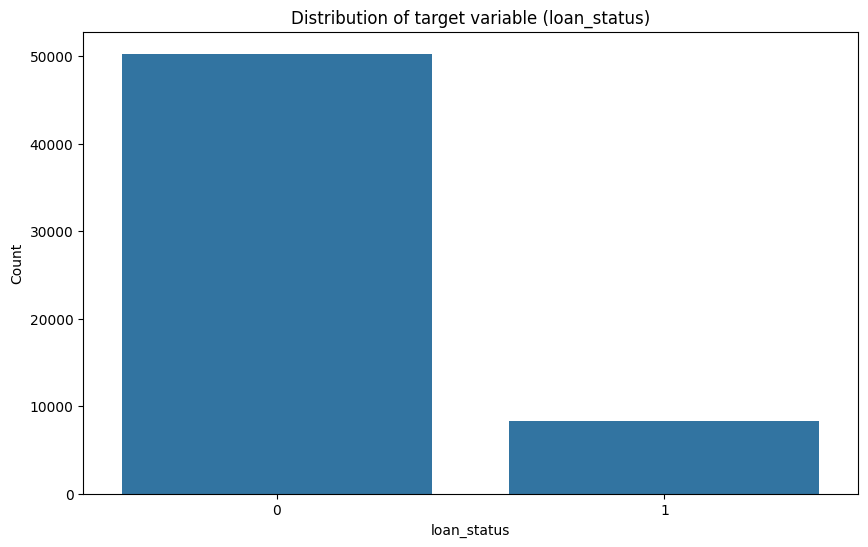

In [5]:
print("\n--- Distribution of target variable ---")
loan_status_counts = data['loan_status'].value_counts(normalize=True) * 100
print(loan_status_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of target variable (loan_status)')
plt.ylabel('Count')
plt.show()

### Data preprocessing 
#### Missing values

In [6]:
print("\n--- Missing values ---")
missing_values = data.isnull().sum()
print(missing_values)

print("\nRows containing missing values:")
print(data[data.isnull().any(axis=1)])


--- Missing values ---
id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

Rows containing missing values:
Empty DataFrame
Columns: [id, person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length, loan_status]
Index: []


#### 

#### Correlation of atributes

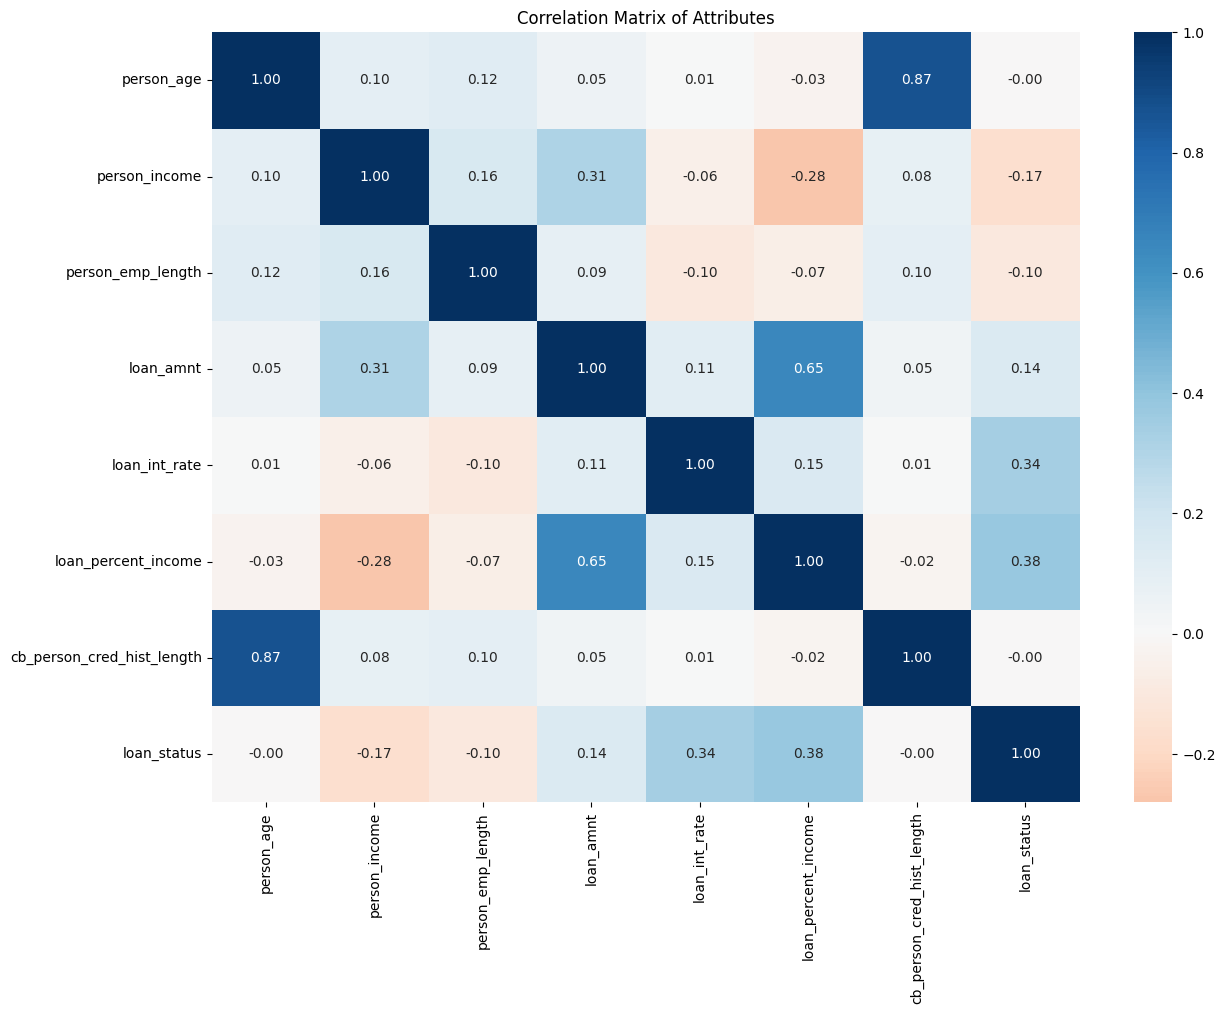

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_encoded = pd.get_dummies(data.drop(columns=["id", "person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]))

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title("Correlation Matrix of Attributes")
plt.show()

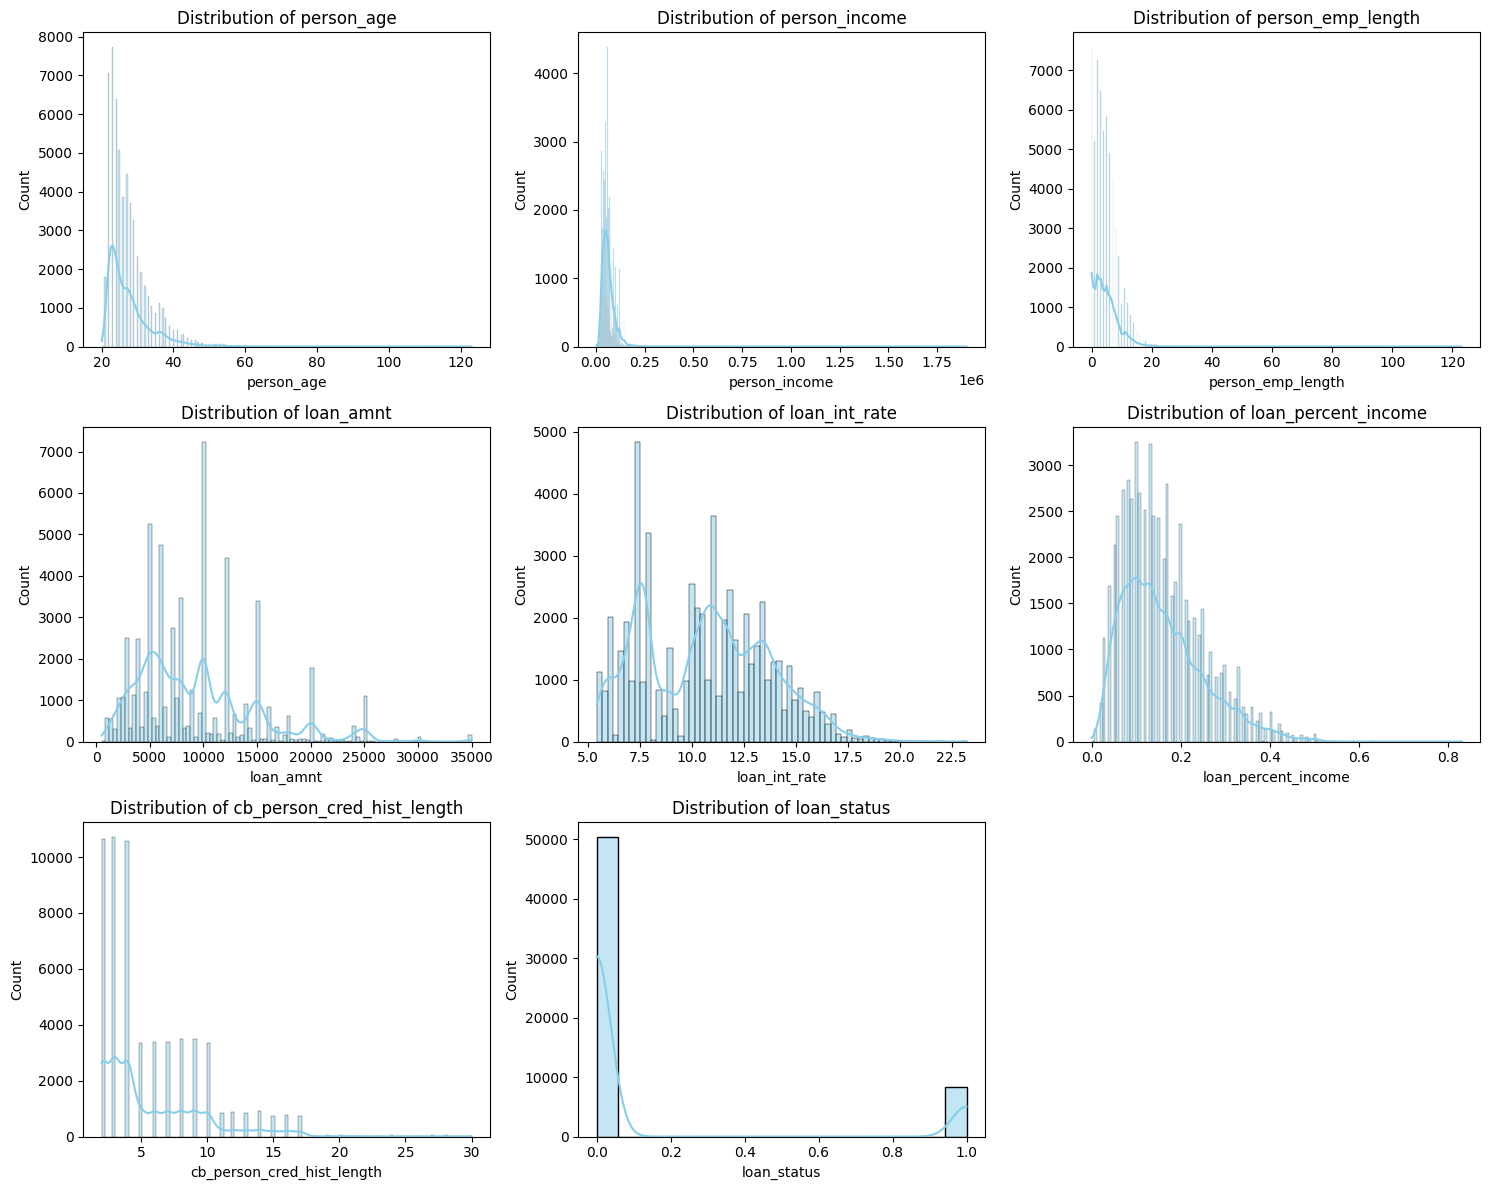

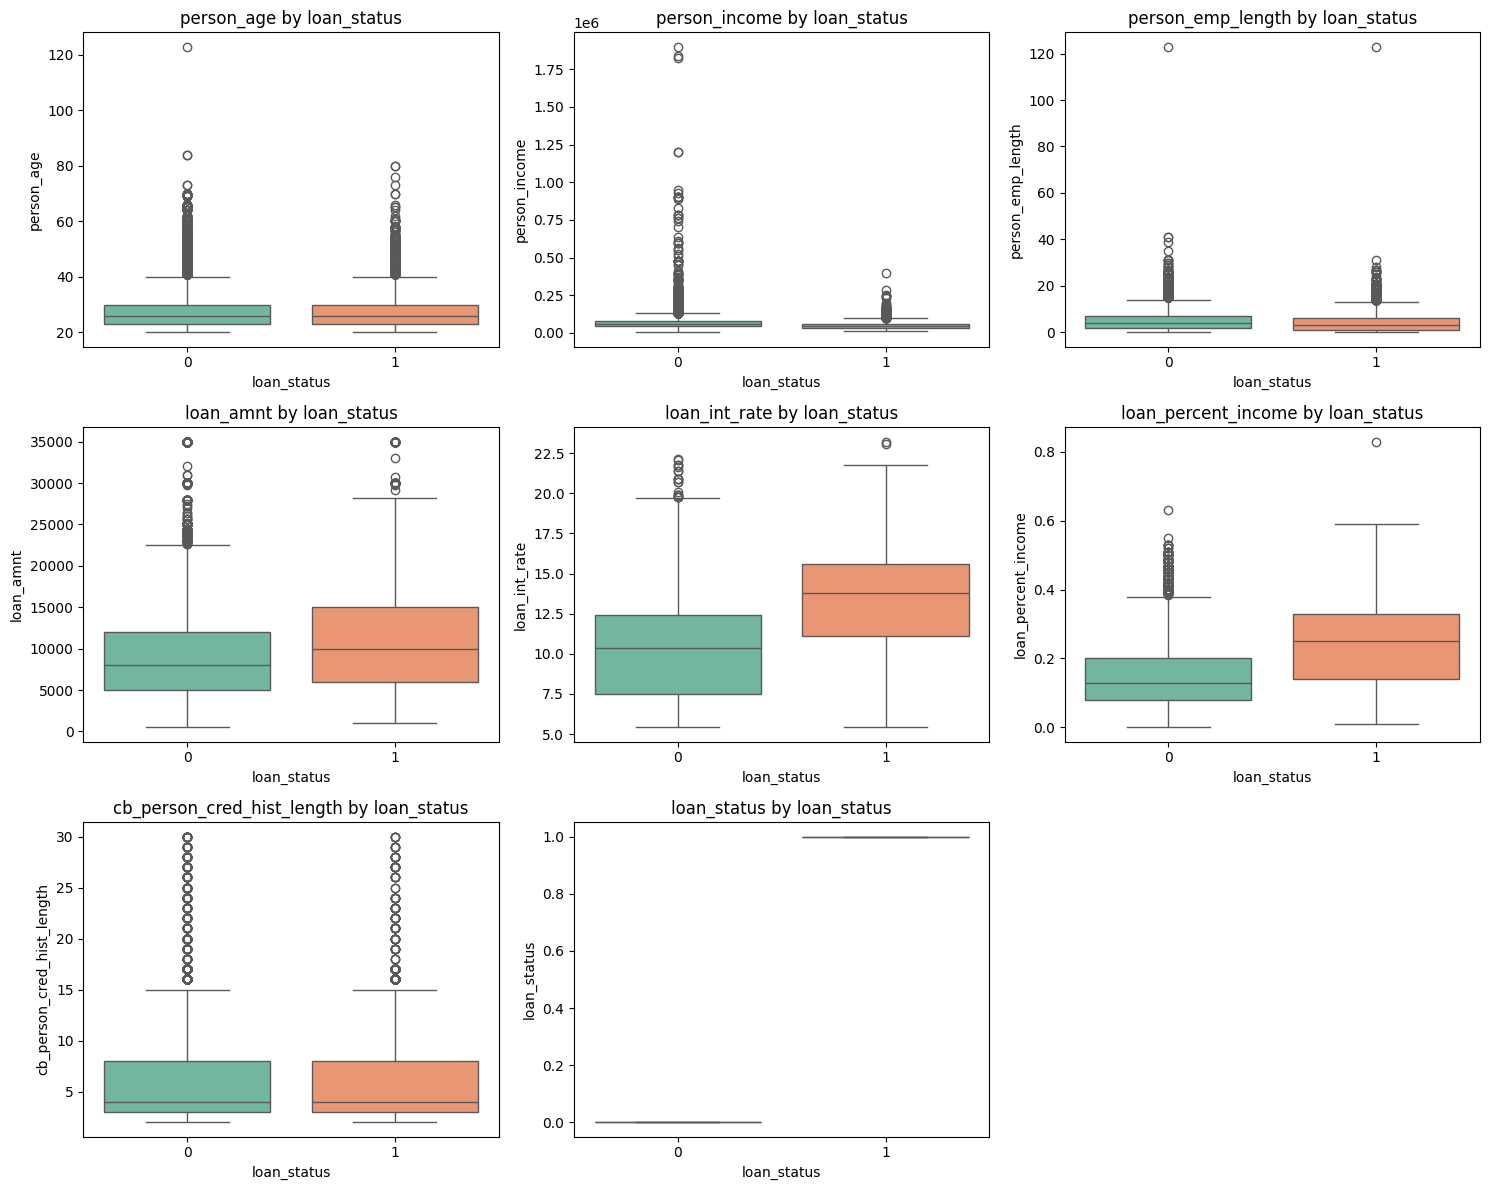

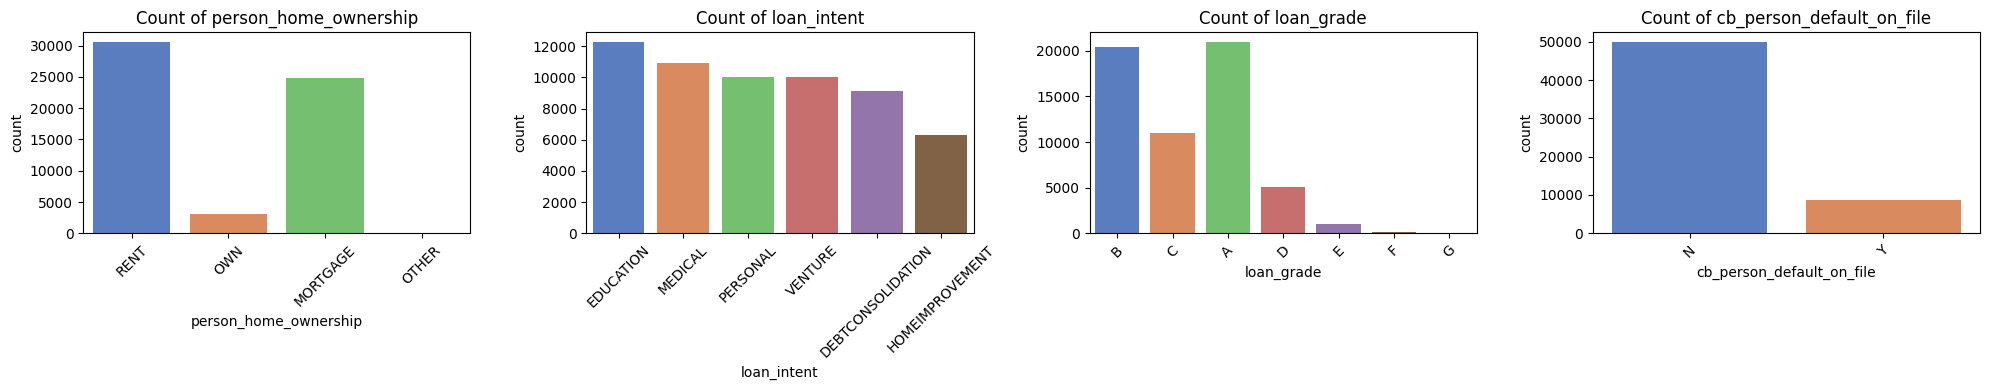

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numeric_columns(data, numeric_cols, cols_per_row=3):
    rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(data[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


def plot_numeric_boxplots(data, numeric_cols, target_col, cols_per_row=3):
    rows = (len(numeric_cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=target_col, y=col, data=data, ax=axes[i], hue=target_col, palette='Set2', legend=False)
        axes[i].set_title(f'{col} by {target_col}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


def plot_categorical_columns(data, categorical_cols, cols_per_row=4):
    rows = (len(categorical_cols) + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(5 * cols_per_row, 4 * rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, hue=col, data=data, ax=axes[i], palette='muted', legend=False)
        axes[i].set_title(f'Count of {col}')
        axes[i].tick_params(axis='x', rotation=45)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('id')  # Se não quiseres o 'id'
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Plots
plot_numeric_columns(data, numeric_cols)
plot_numeric_boxplots(data, numeric_cols, target_col='loan_status')
plot_categorical_columns(data, categorical_cols)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.3f}'.format)

def analyze_numeric_attribute(df, column_name):
    print(f"\n=== Analysis of {column_name} ===")
    stats = df[column_name].describe()
    print(stats)
    
    missing = df[column_name].isna().sum()
    missing_percent = (missing / len(df)) * 100
    print(f"\nMissing values: {missing} ({missing_percent:.2f}%)")
    
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()
    print(f"Outliers: {outliers} ({(outliers/len(df))*100:.2f}%)")
    
    print(f"Median: {df[column_name].median()}")
    print(f"Mode: {df[column_name].mode().values[0]}")
    print(f"Variance: {df[column_name].var()}")

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[column_name], kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {column_name}')
    
    sns.boxplot(x=df[column_name], ax=ax2)
    ax2.set_title(f'Box Plot of {column_name}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='loan_status', y=column_name, data=df)
    plt.title(f'{column_name} by Loan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_categorical_attribute(df, column_name):
    print(f"\n=== Analysis of {column_name} ===")
    
    plt.figure(figsize=(12, 6))
    sns.countplot(y=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(f'Distribution of {column_name}')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    crosstab = pd.crosstab(df[column_name], df['loan_status'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=False)
    plt.title(f'Percentage of Loan Status by {column_name}')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title='loan_status')
    plt.tight_layout()
    plt.show()   


=== Analysis of person_age ===
count   58645.000
mean       27.551
std         6.033
min        20.000
25%        23.000
50%        26.000
75%        30.000
max       123.000
Name: person_age, dtype: float64

Missing values: 0 (0.00%)
Outliers: 2446 (4.17%)
Median: 26.0
Mode: 23
Variance: 36.39969254217415


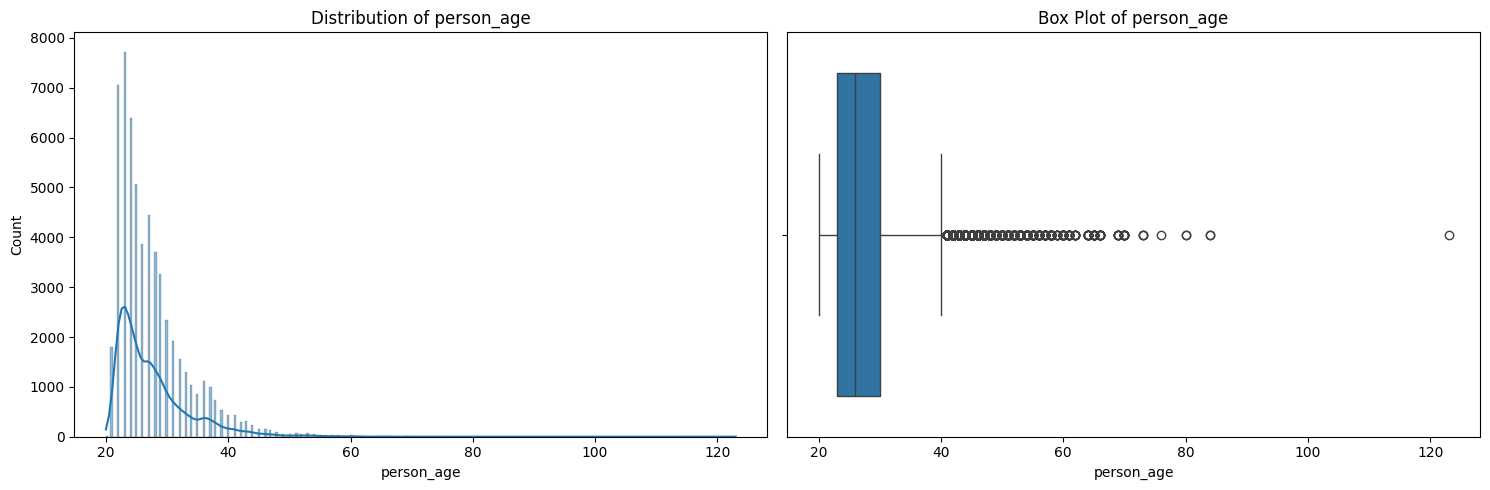

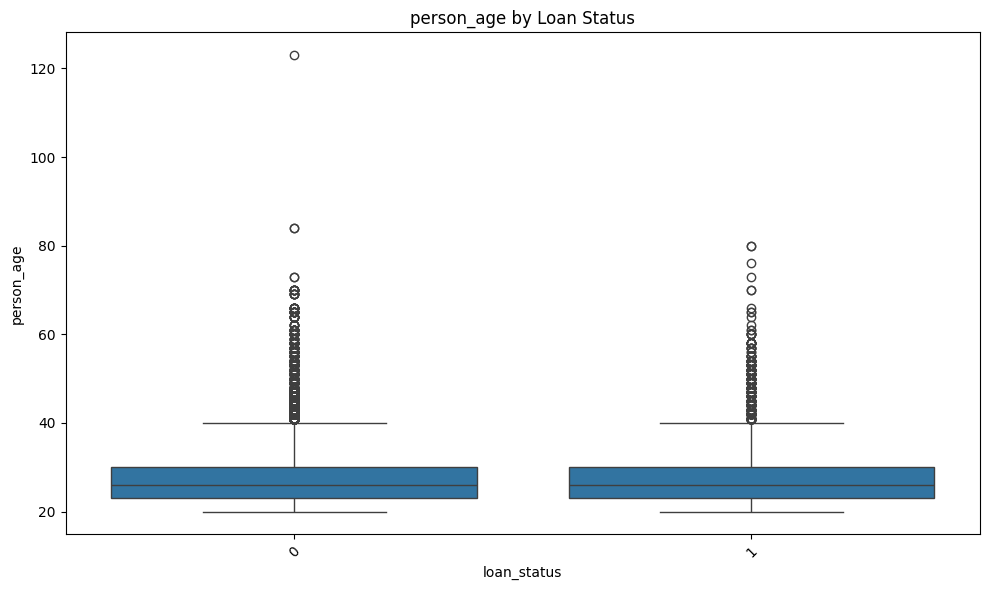


=== Analysis of person_income ===
count     58645.000
mean      64046.173
std       37931.107
min        4200.000
25%       42000.000
50%       58000.000
75%       75600.000
max     1900000.000
Name: person_income, dtype: float64

Missing values: 0 (0.00%)
Outliers: 2411 (4.11%)
Median: 58000.0
Mode: 60000
Variance: 1438768876.6143749


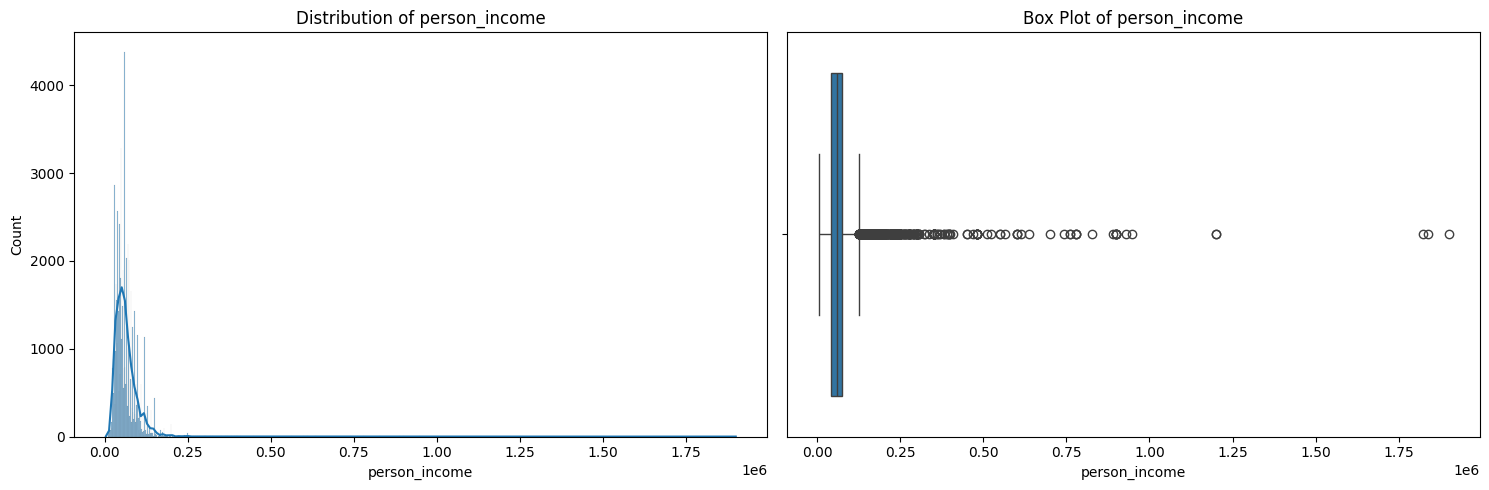

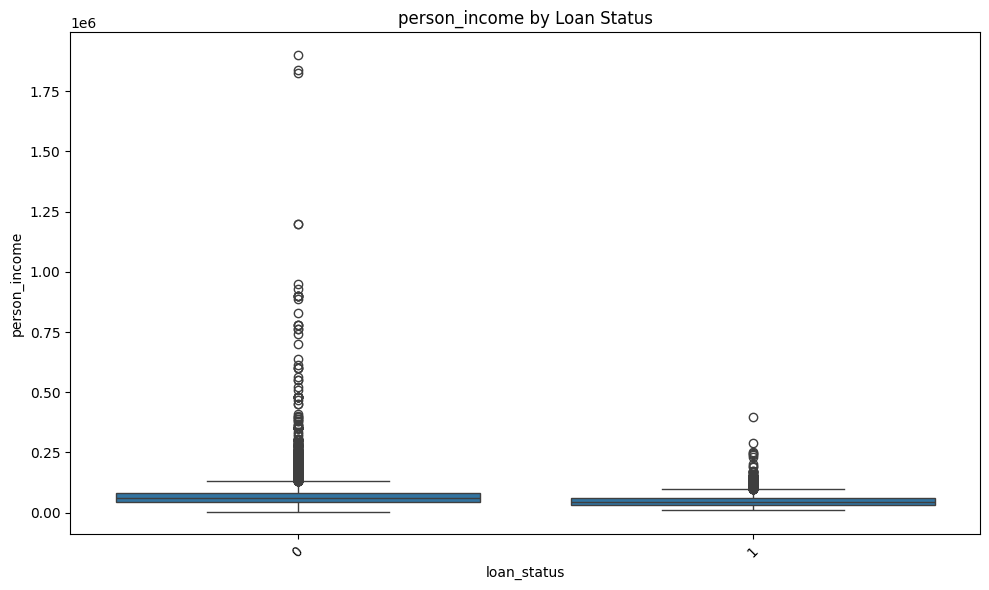


=== Analysis of person_emp_length ===
count   58645.000
mean        4.701
std         3.960
min         0.000
25%         2.000
50%         4.000
75%         7.000
max       123.000
Name: person_emp_length, dtype: float64

Missing values: 0 (0.00%)
Outliers: 1274 (2.17%)
Median: 4.0
Mode: 0.0
Variance: 15.679892054302824


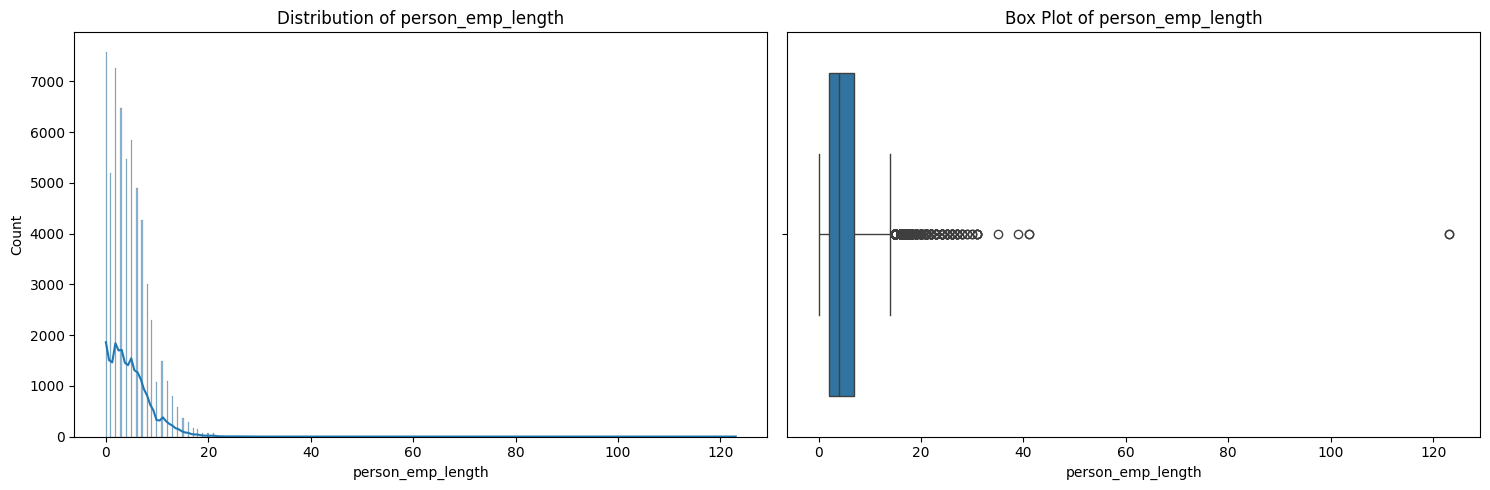

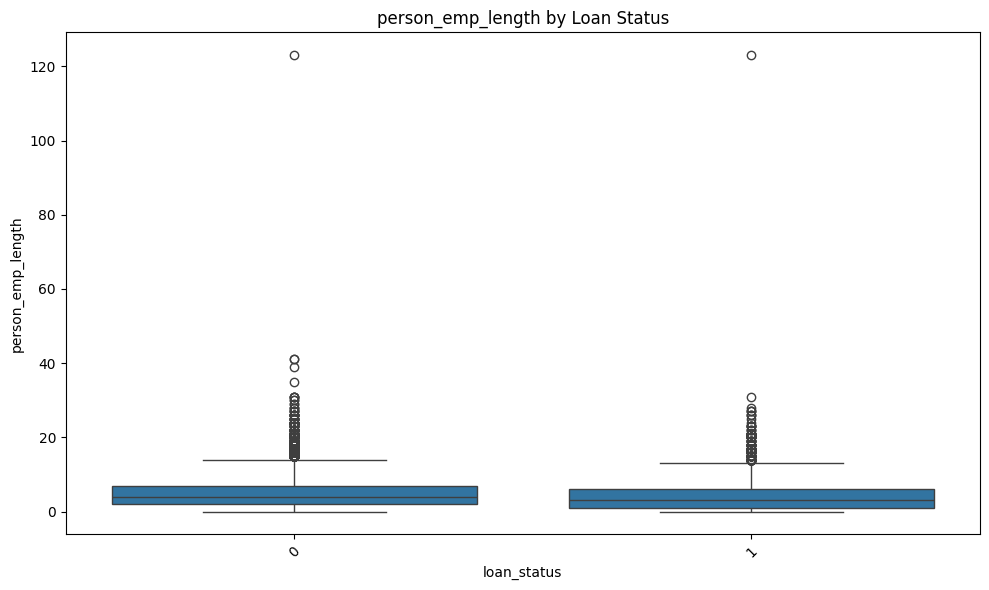


=== Analysis of loan_amnt ===
count   58645.000
mean     9217.557
std      5563.807
min       500.000
25%      5000.000
50%      8000.000
75%     12000.000
max     35000.000
Name: loan_amnt, dtype: float64

Missing values: 0 (0.00%)
Outliers: 2045 (3.49%)
Median: 8000.0
Mode: 10000
Variance: 30955952.608074497


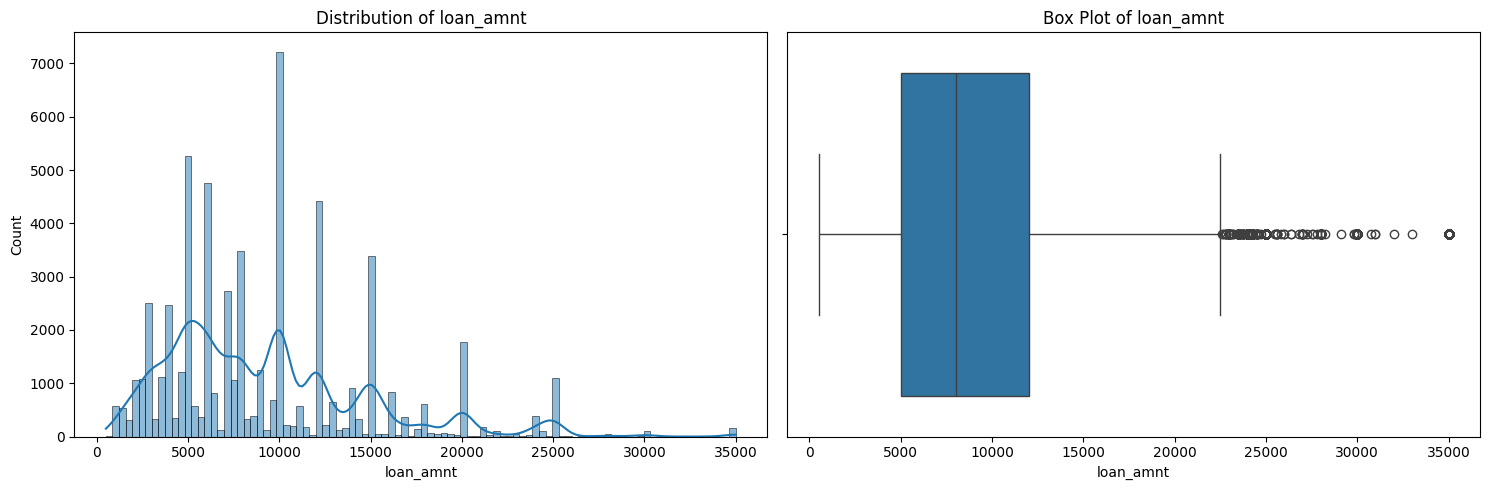

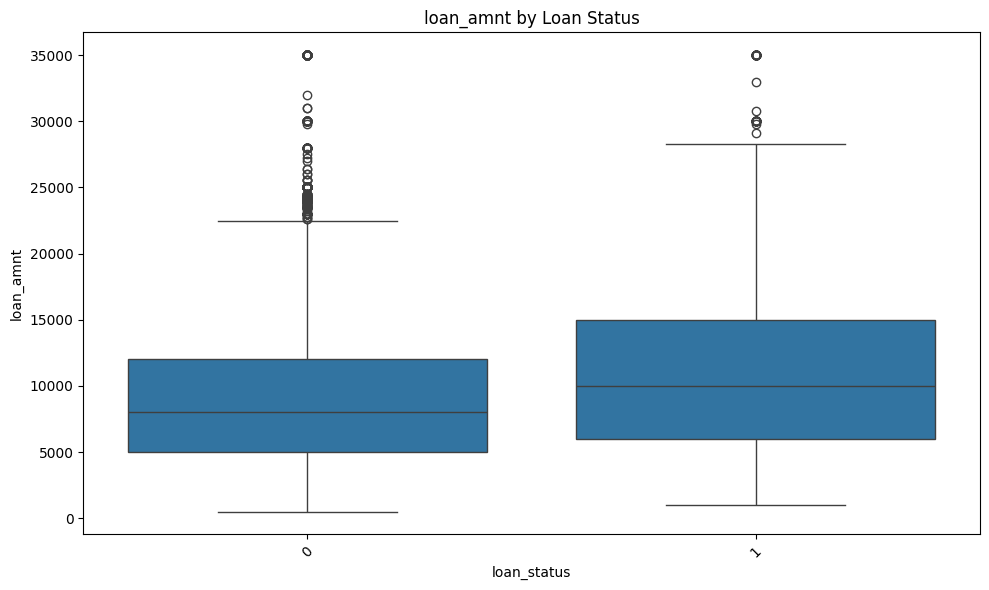


=== Analysis of loan_int_rate ===
count   58645.000
mean       10.678
std         3.035
min         5.420
25%         7.880
50%        10.750
75%        12.990
max        23.220
Name: loan_int_rate, dtype: float64

Missing values: 0 (0.00%)
Outliers: 34 (0.06%)
Median: 10.75
Mode: 10.99
Variance: 9.209387114731488


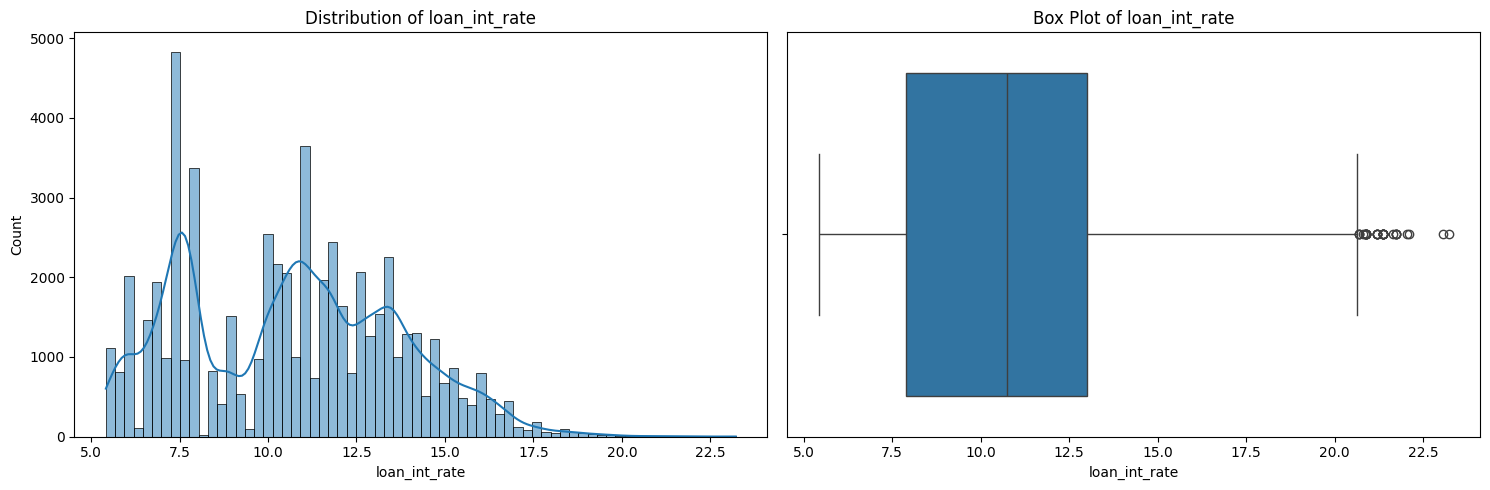

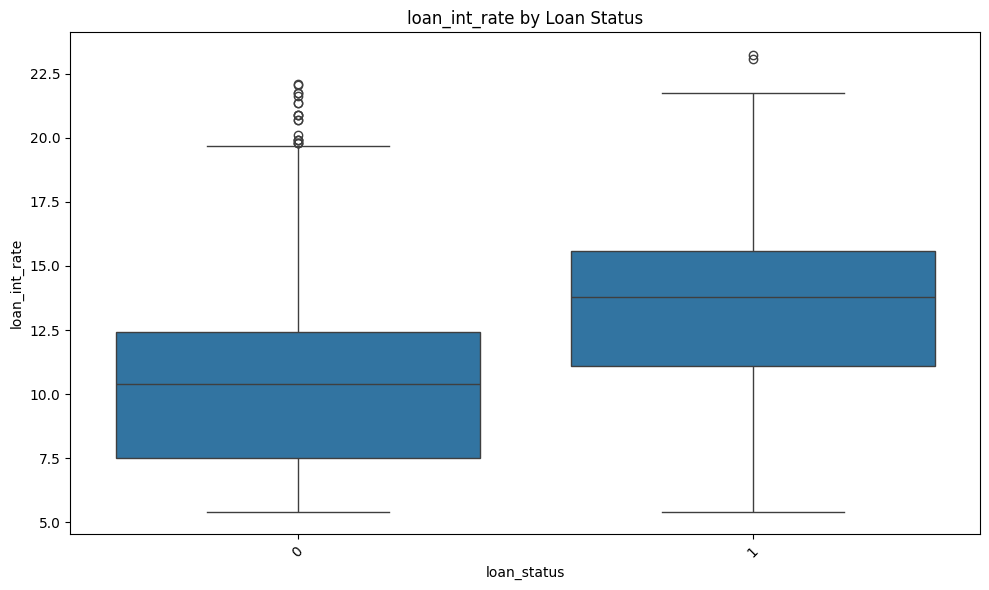


=== Analysis of loan_percent_income ===
count   58645.000
mean        0.159
std         0.092
min         0.000
25%         0.090
50%         0.140
75%         0.210
max         0.830
Name: loan_percent_income, dtype: float64

Missing values: 0 (0.00%)
Outliers: 1210 (2.06%)
Median: 0.14
Mode: 0.1
Variance: 0.008407384910127548


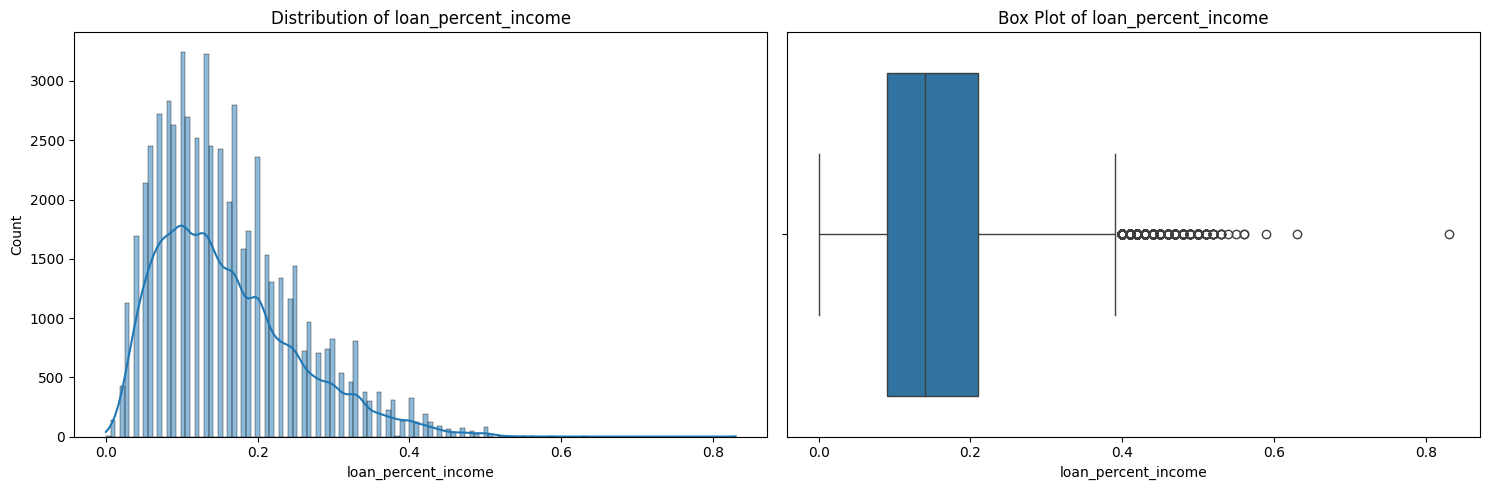

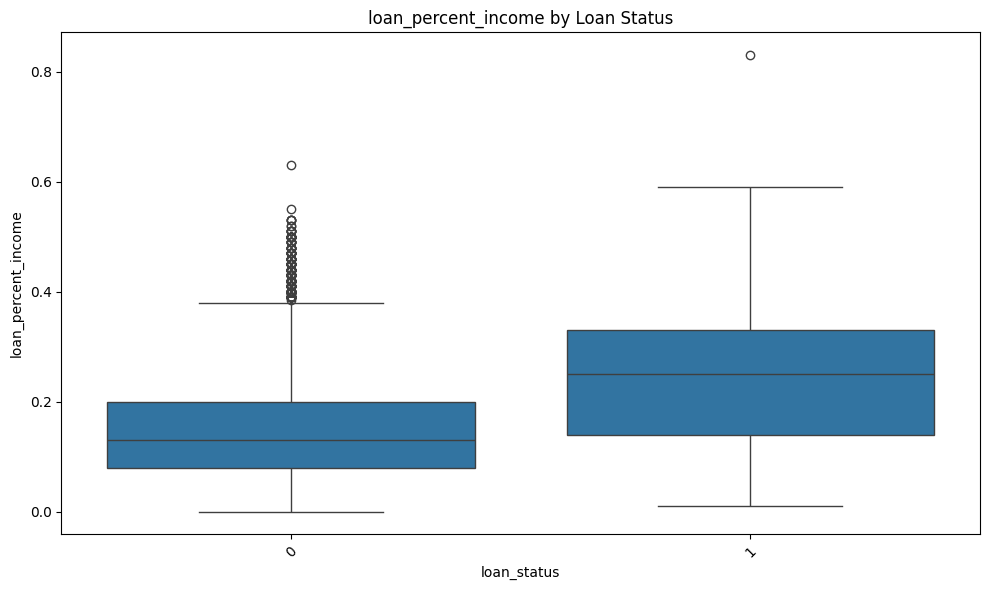


=== Analysis of cb_person_cred_hist_length ===
count   58645.000
mean        5.814
std         4.029
min         2.000
25%         3.000
50%         4.000
75%         8.000
max        30.000
Name: cb_person_cred_hist_length, dtype: float64

Missing values: 0 (0.00%)
Outliers: 1993 (3.40%)
Median: 4.0
Mode: 3
Variance: 16.234421643585016


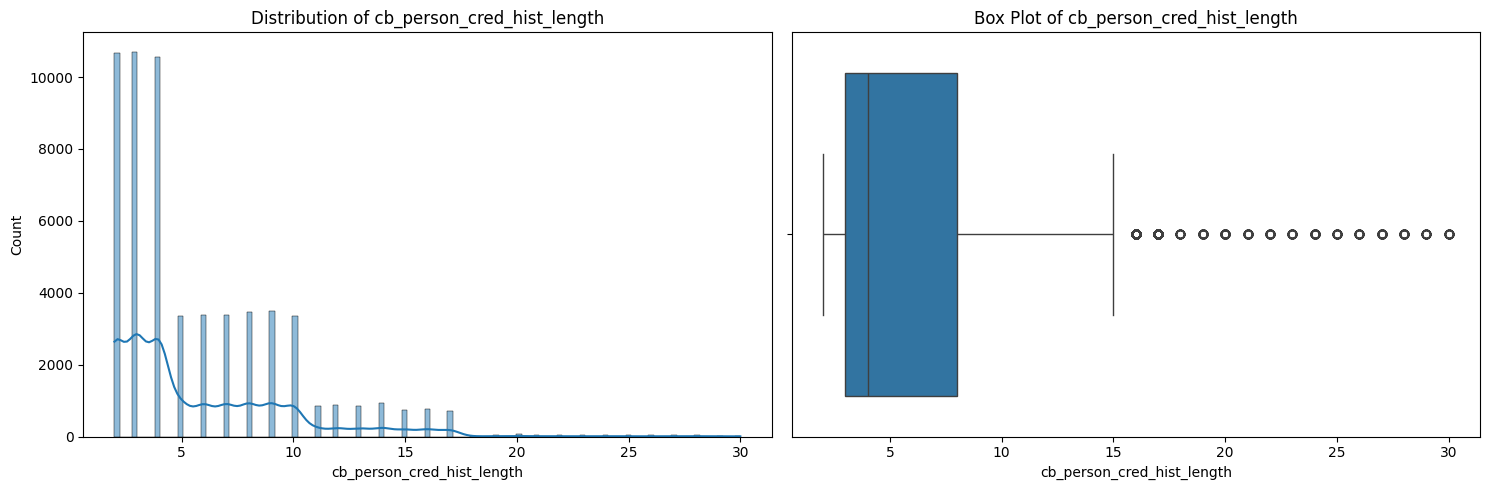

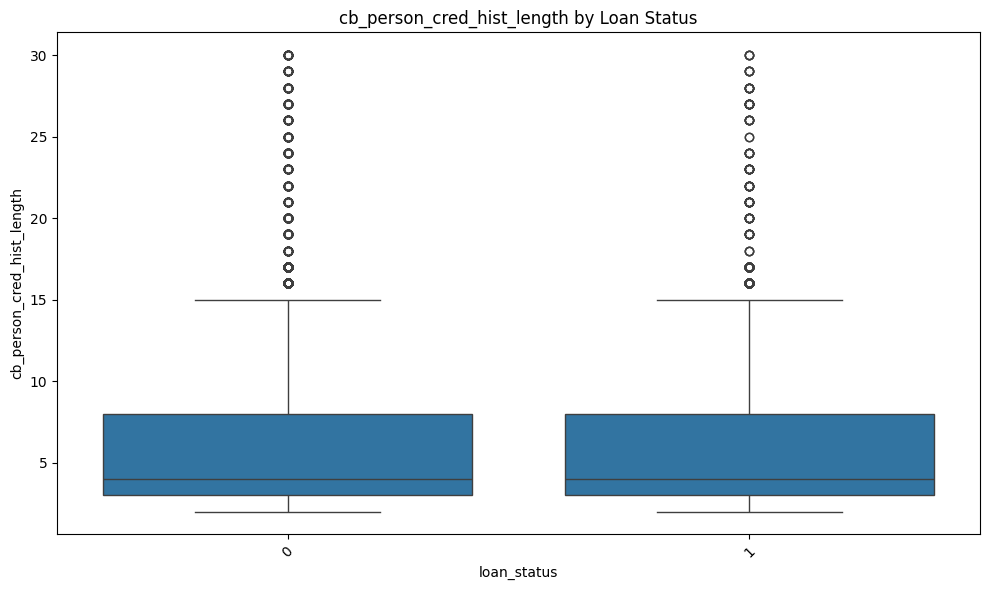


=== Analysis of person_home_ownership ===


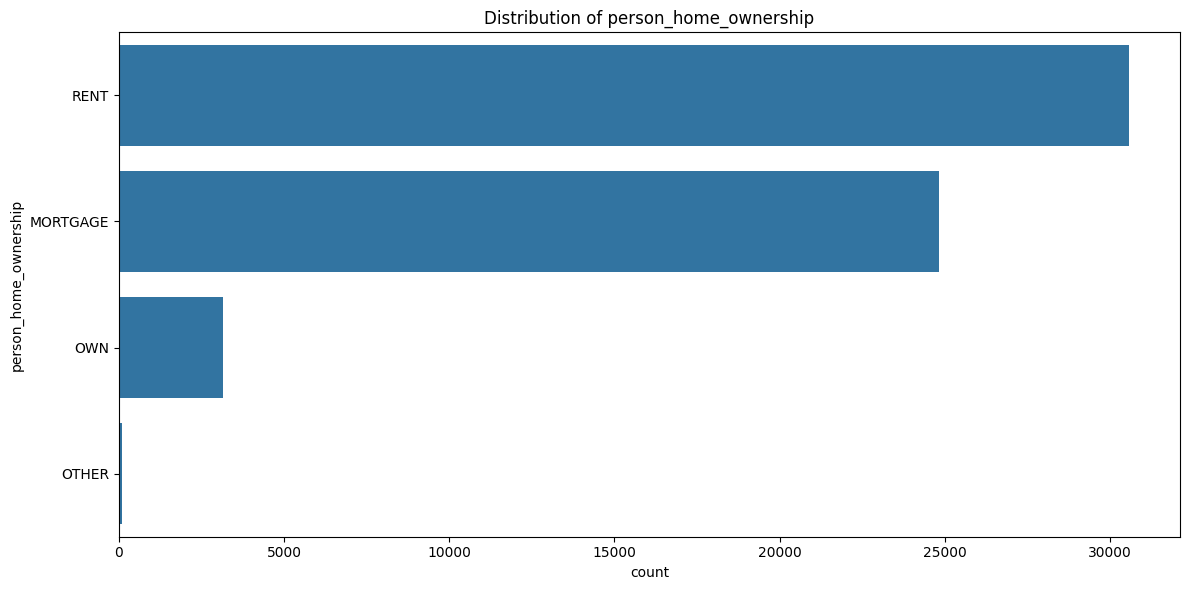

<Figure size 1200x600 with 0 Axes>

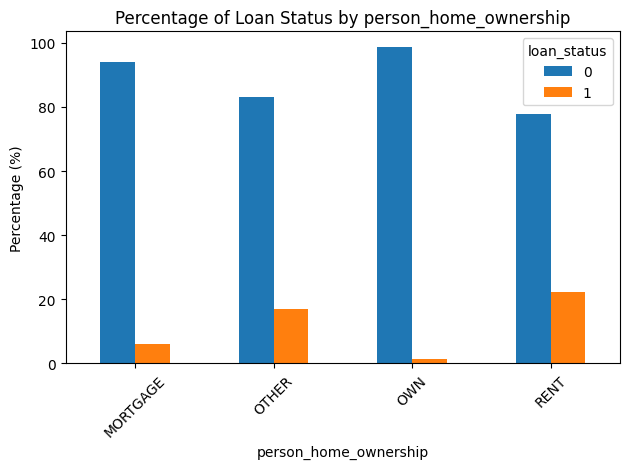


=== Analysis of loan_intent ===


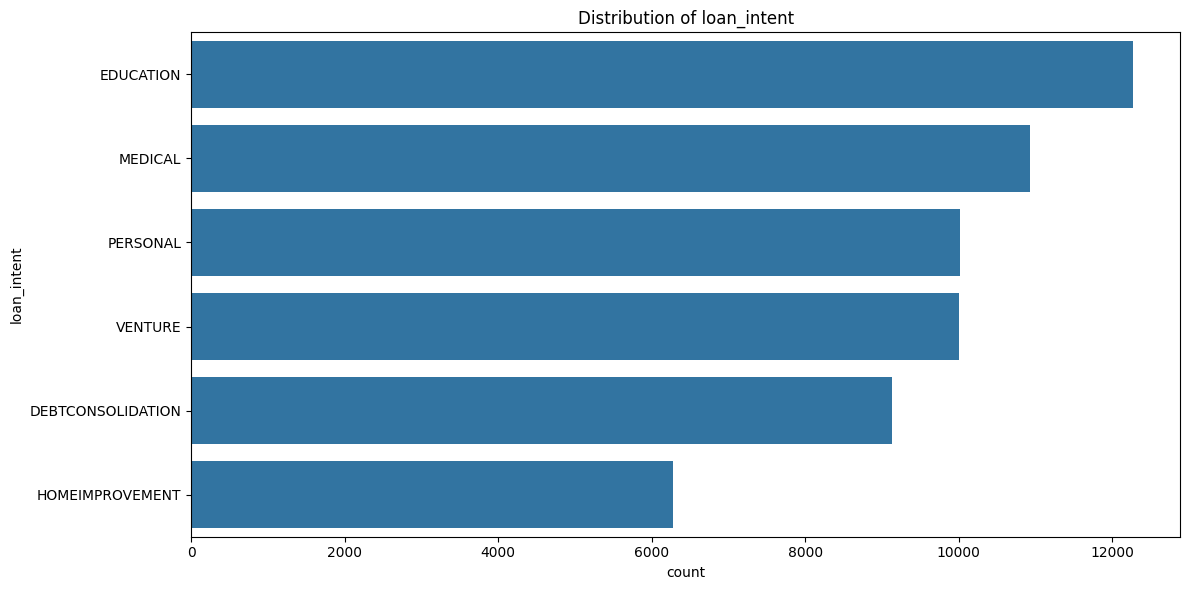

<Figure size 1200x600 with 0 Axes>

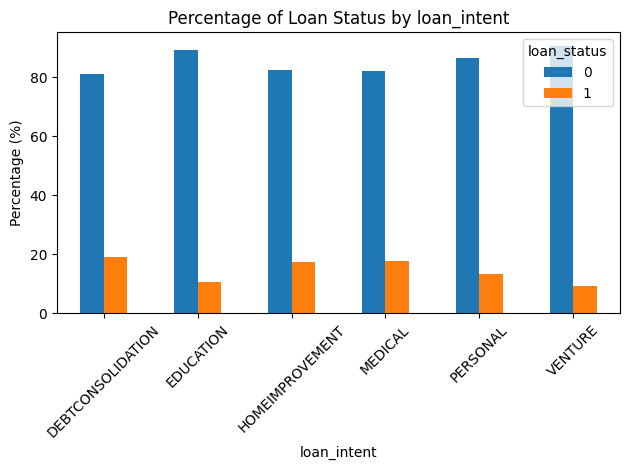


=== Analysis of loan_grade ===


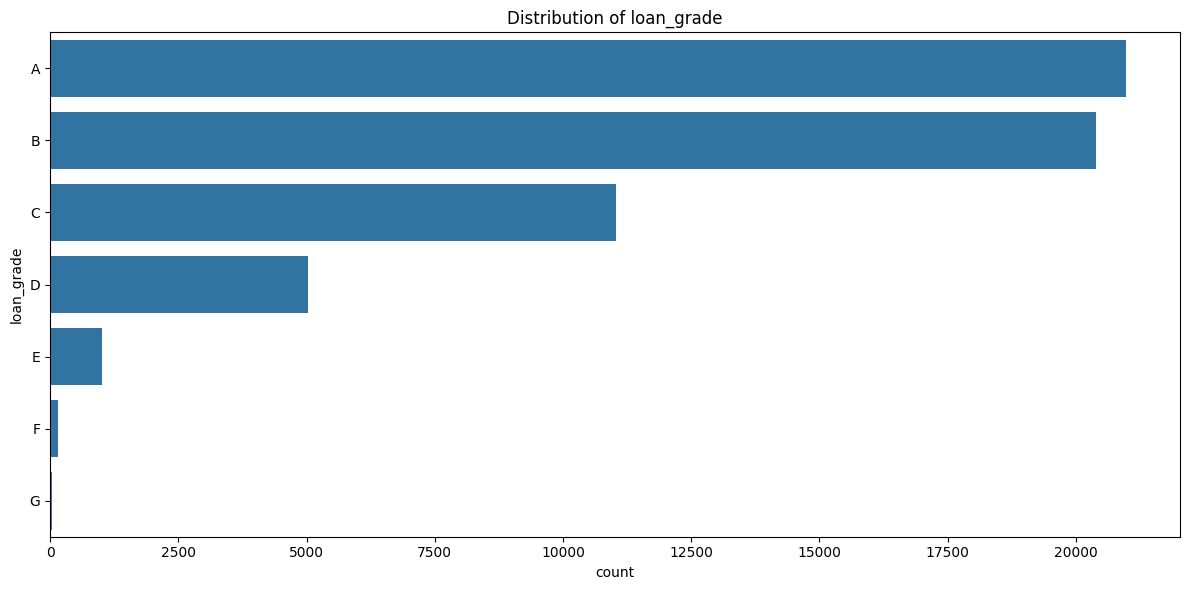

<Figure size 1200x600 with 0 Axes>

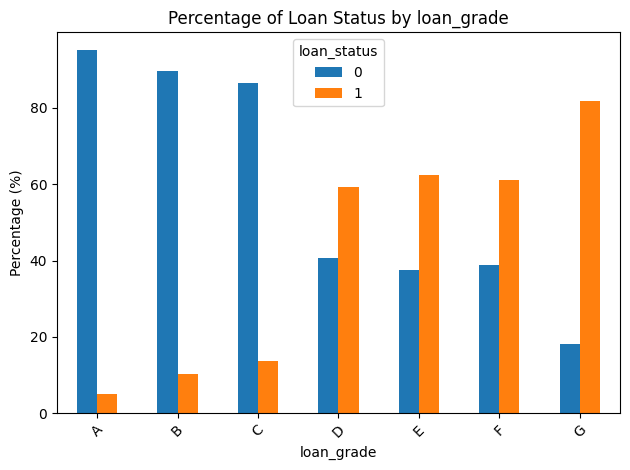


=== Analysis of cb_person_default_on_file ===


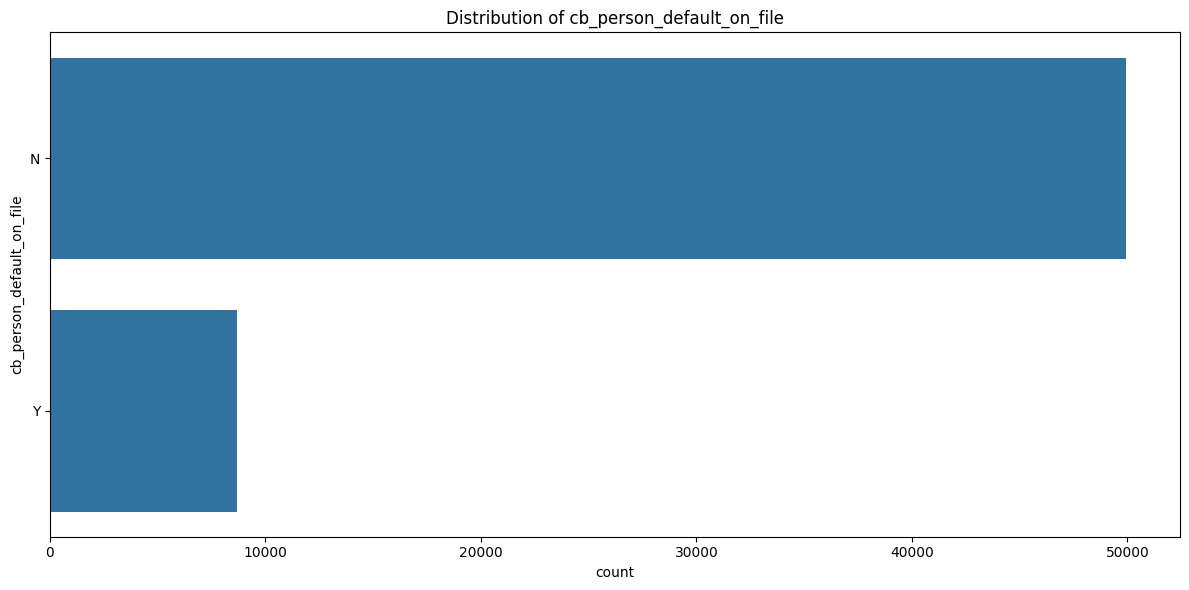

<Figure size 1200x600 with 0 Axes>

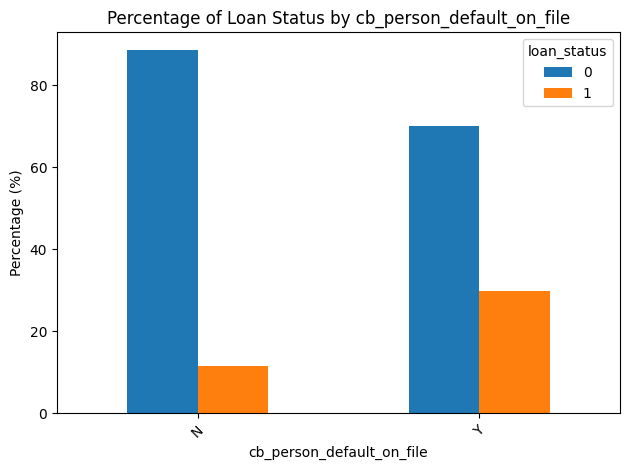

In [10]:
numeric_attributes = [
    'person_age', 'person_income', 'person_emp_length', 
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
    'cb_person_cred_hist_length'
]

categorical_attributes = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'cb_person_default_on_file'
]

for attr in numeric_attributes:
    if attr in data.columns:
        analyze_numeric_attribute(data, attr)

for attr in categorical_attributes:
    if attr in data.columns:
        analyze_categorical_attribute(data, attr)


### Supervised Learning Algorithms

#### Decision Tree

In [11]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"])

# Convert boolean values to integers
data = data.astype({col: int for col in data.select_dtypes(include=['bool']).columns})

# Define inputs and labels
all_inputs = data.drop(columns=["loan_status", "id"]).values  # Drop 'loan_status' and 'id' from inputs
all_labels = data["loan_status"].values  # Use 'loan_status' as label

# Check the dtype of all_inputs
print(all_inputs.dtype)


float64


(array([ 5.,  4.,  8., 13., 19., 15., 11., 13.,  8.,  4.]),
 array([0.90847088, 0.90943255, 0.91039422, 0.91135589, 0.91231756,
        0.91327923, 0.91424089, 0.91520256, 0.91616423, 0.9171259 ,
        0.91808757]),
 <BarContainer object of 10 artists>)

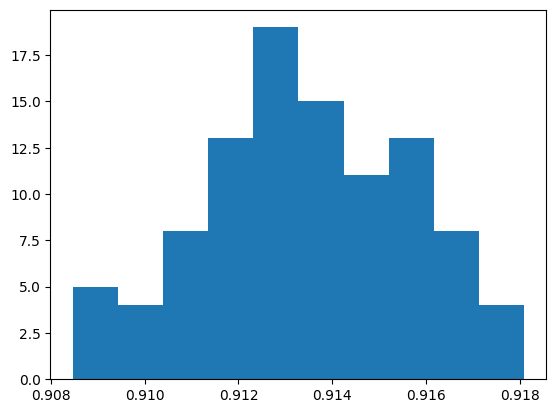

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_accuracies = []

for repetition in range(100):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier(random_state=1)

    # Train the classifier on the training set
    decision_tree_classifier.fit(training_inputs, training_classes)

    # Validate the classifier on the testing set
    predicted_classes = decision_tree_classifier.predict(testing_inputs)

    model_accuracies.append(accuracy_score(testing_classes, predicted_classes))

plt.hist(model_accuracies)

Try decision tree with k-fold

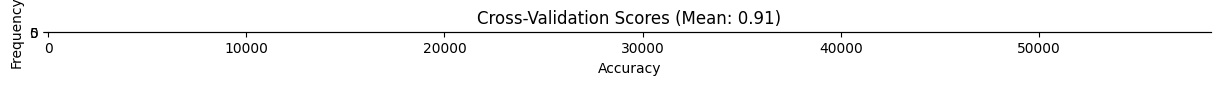

[0.91133845 0.91713555 0.91747656 0.91611253 0.91935209 0.92087312
 0.91371078 0.91592769 0.90961801 0.91081173]
Average accuracy across 10 folds: 0.92


In [13]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

def plot_cv(cv, features, labels):
    masks = []
    for train, test in cv.split(features, labels):
        mask = np.zeros(len(labels), dtype=bool)
        mask[test] = 1
        masks.append(mask)
    
    plt.figure(figsize=(15, 15))
    plt.imshow(masks, interpolation='none', cmap='gray_r')
    plt.ylabel('Fold')
    plt.xlabel('Row #')

plot_cv(StratifiedKFold(n_splits=10), all_inputs, all_labels)

from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=stratified_kfold)

plt.hist(cv_scores, bins=10, edgecolor='black')
plt.title(f'Cross-Validation Scores (Mean: {np.mean(cv_scores):.2f})')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(cv_scores)
print(f"Average accuracy across 10 folds: {np.mean(cv_scores):.2f}")

Find best performing parameters

Best score: 0.9467132235182465
Best parameters: {'max_depth': 10, 'max_features': 11}


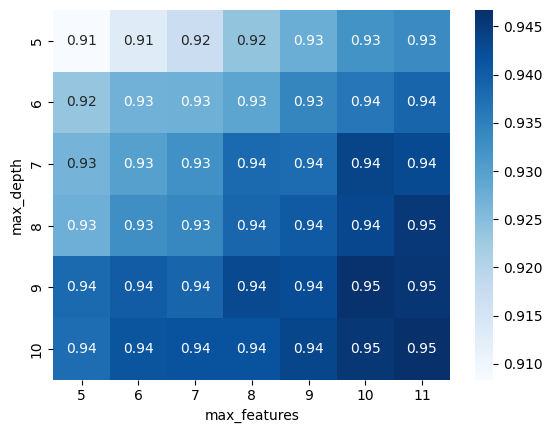

In [14]:
from sklearn.model_selection import GridSearchCV
import seaborn as sb
decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {
    'max_depth': [5, 6, 7, 8, 9, 10],
    'max_features': [5, 6, 7, 8, 9, 10, 11],
}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
grid_search = GridSearchCV(
    estimator=decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation,
    scoring='accuracy'
)
grid_search.fit(all_inputs, all_labels)

grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (len(parameter_grid['max_depth']), len(parameter_grid['max_features']))

sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(len(parameter_grid['max_features'])) + 0.5, parameter_grid['max_features'])
plt.yticks(np.arange(len(parameter_grid['max_depth'])) + 0.5, parameter_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))



In [15]:
import sklearn.tree as tree

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                    'max_depth': [5, 6, 7, 8, 9, 10],
                        'max_features': [5, 6, 7, 8, 9, 10, 11]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

decision_tree_classifier = grid_search.best_estimator_

with open('loan_tree.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

Best score: 0.9470714513339591
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 11, 'splitter': 'best'}


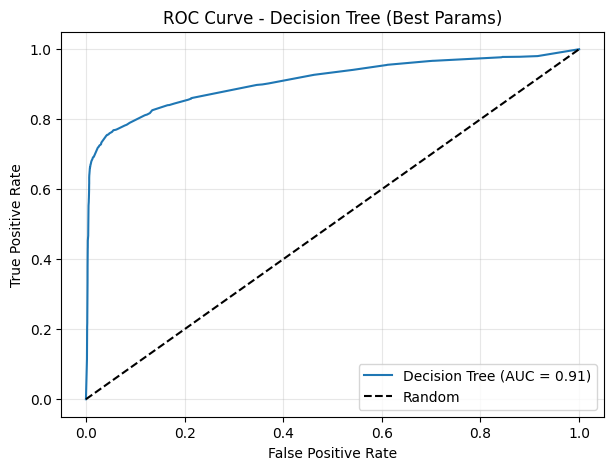

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

best_tree = grid_search.best_estimator_
best_tree.fit(training_inputs, training_classes)

y_proba = best_tree.predict_proba(testing_inputs)[:, 1]

fpr, tpr, thresholds = roc_curve(testing_classes, y_proba)
auc = roc_auc_score(testing_classes, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Best Params)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


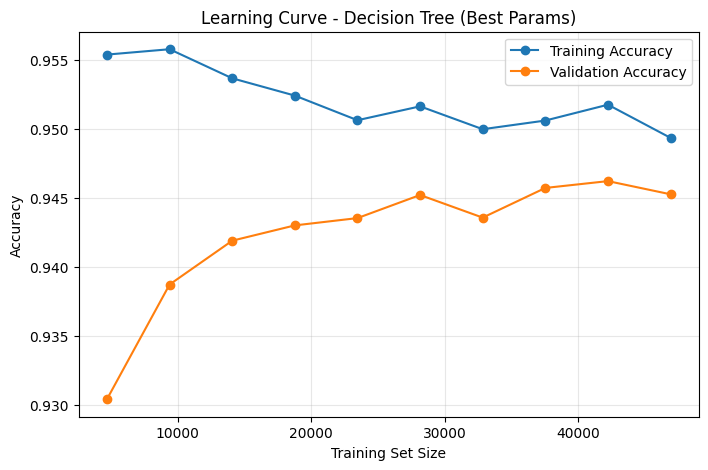

In [17]:
from sklearn.model_selection import learning_curve

best_tree = grid_search.best_estimator_

train_sizes, train_scores, val_scores = learning_curve(
    best_tree,
    all_inputs, all_labels,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Decision Tree (Best Params)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Precision, Recall, F1 and Confusion Matrix

In [37]:
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# Split the data
training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

# Use the best estimator from grid search
best_tree = grid_search.best_estimator_
best_tree.fit(training_inputs, training_classes)

# Predict on the test set
y_pred = best_tree.predict(testing_inputs)

# Calculate precision
precision = precision_score(testing_classes, y_pred)
print(f"Precision (Decision Tree with best parameters): {precision:.4f}")

Precision (Decision Tree with best parameters): 0.6589


In [40]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use the best estimator from grid search for recall calculation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
best_tree = grid_search.best_estimator_

recall_scores = cross_val_score(
    best_tree,
    all_inputs,
    all_labels,
    cv=stratified_kfold,
    scoring='recall'
)

print("Recall scores for each fold (best params):", recall_scores)
print("Average recall across 10 folds (best params): {:.4f}".format(recall_scores.mean()))

Recall scores for each fold (best params): [0.51736527 0.49461078 0.51017964 0.49341317 0.50778443 0.52215569
 0.51017964 0.49101796 0.50658683 0.48742515]
Average recall across 10 folds (best params): 0.5041


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use the best estimator from grid search for F1-score calculation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
best_tree = grid_search.best_estimator_

f1_scores = cross_val_score(
    best_tree,
    all_inputs,
    all_labels,
    cv=stratified_kfold,
    scoring='f1'
)

print("F1 scores for each fold (best params):", f1_scores)
print("Average F1-score across 10 folds (best params): {:.4f}".format(f1_scores.mean()))

F1 scores for each fold (best params): [0.58378378 0.57281553 0.58316222 0.57381616 0.58241758 0.59078591
 0.56611296 0.56396149 0.57394844 0.55411845]
Average F1-score across 10 folds (best params): 0.5745


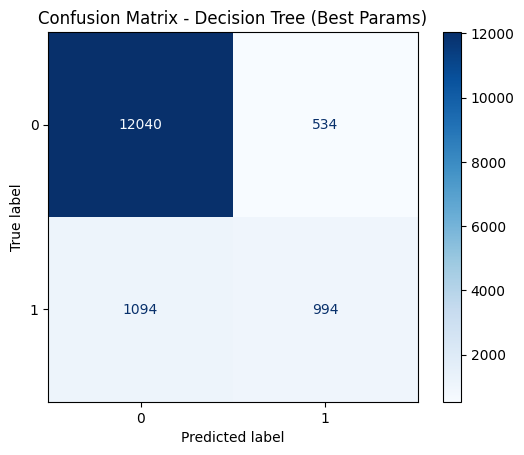

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=1
)

# Train the Decision Tree with best parameters
best_tree = grid_search.best_estimator_
best_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = best_tree.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree (Best Params)")
plt.show()

RANDOM FOREST


Best RF score: 0.9512149373348111
Best RF params: {'max_depth': 10, 'max_features': 11, 'n_estimators': 100}


,param_n_estimators,mean_test_score,std_test_score
0,10,0.950,0.003
1,50,0.951,0.003
2,100,0.951,0.002
3,200,0.951,0.002
4,300,0.951,0.002
5,500,0.951,0.002
6,1000,0.951,0.002


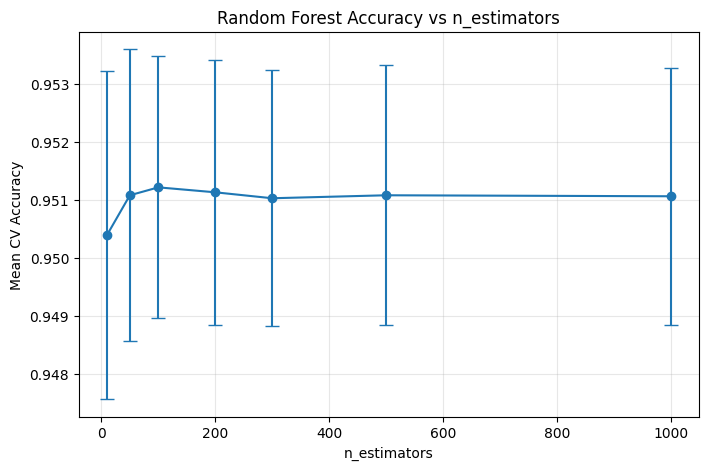

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 500, 1000],
    'max_depth': [10],
    'max_features': [11]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(all_inputs, all_labels)

print("Best RF score:", grid_search_rf.best_score_)
print("Best RF params:", grid_search_rf.best_params_)

results = pd.DataFrame(grid_search_rf.cv_results_)
display(results[['param_n_estimators', 'mean_test_score', 'std_test_score']])

plt.figure(figsize=(8,5))
plt.errorbar(
    results['param_n_estimators'], 
    results['mean_test_score'], 
    yerr=results['std_test_score'], 
    fmt='o-', capsize=5
)
plt.xlabel('n_estimators')
plt.ylabel('Mean CV Accuracy')
plt.title('Random Forest Accuracy vs n_estimators')
plt.grid(True, alpha=0.3)
plt.show()

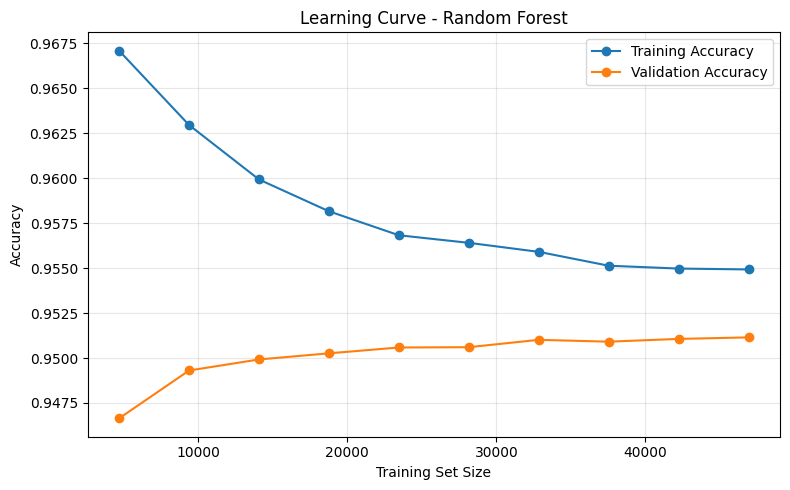

In [67]:

best_rf = grid_search_rf.best_estimator_
train_sizes, train_scores, val_scores = learning_curve(
    best_rf, all_inputs, all_labels, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
)
train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


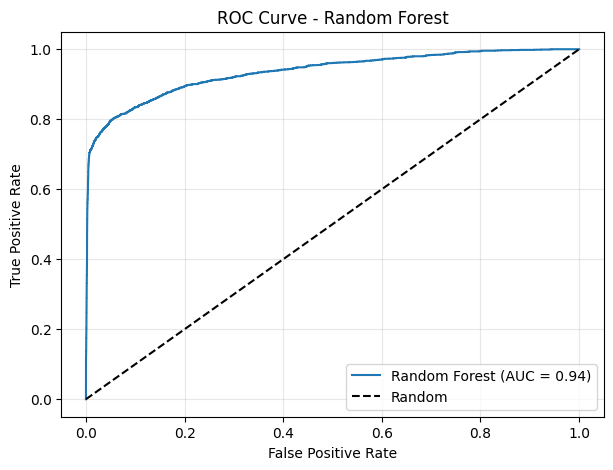

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)
best_rf.fit(X_train, y_train)
y_proba = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Precision, Recall, F1 and Confusion Matrix

In [69]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store precision scores
precision_scores = []

# Get best model parameters from earlier grid search
best_rf = grid_search_rf.best_estimator_

# Calculate precision using cross-validation
for train_idx, test_idx in cv.split(all_inputs, all_labels):
    # Split the data
    X_train, X_test = all_inputs[train_idx], all_inputs[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    
print("Precision scores for each fold:", precision_scores)
print(f"Average precision across folds: {np.mean(precision_scores):.4f}")
print(f"Standard deviation of precision: {np.std(precision_scores):.4f}")


Precision scores for each fold: [0.9253246753246753, 0.9347471451876019, 0.9388714733542319, 0.9509803921568627, 0.9379084967320261, 0.9503311258278145, 0.9522292993630573, 0.9415481832543444, 0.9439102564102564, 0.9383886255924171]
Average precision across folds: 0.9414
Standard deviation of precision: 0.0079


In [70]:
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store recall scores
recall_scores = []

# Get best Random Forest model from earlier grid search
best_rf = grid_search_rf.best_estimator_

# Calculate recall using cross-validation
for train_idx, test_idx in cv.split(all_inputs, all_labels):
    # Split the data
    X_train, X_test = all_inputs[train_idx], all_inputs[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    
    # Calculate recall 
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

print("Recall scores for each fold:", recall_scores)
print(f"Average recall across folds: {np.mean(recall_scores):.4f}")
print(f"Standard deviation of recall: {np.std(recall_scores):.4f}")


Recall scores for each fold: [0.6826347305389222, 0.6862275449101797, 0.7173652694610778, 0.6970059880239521, 0.6874251497005988, 0.6874251497005988, 0.7161676646706587, 0.7137724550898203, 0.7053892215568862, 0.7113772455089821]
Average recall across folds: 0.7005
Standard deviation of recall: 0.0131


In [71]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store F1 scores
f1_scores = []

# Get best Random Forest model from earlier grid search
best_rf = grid_search_rf.best_estimator_

# Calculate F1-score using cross-validation
for train_idx, test_idx in cv.split(all_inputs, all_labels):
    # Split the data
    X_train, X_test = all_inputs[train_idx], all_inputs[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

print("F1 scores for each fold:", f1_scores)
print(f"Average F1-score across folds: {np.mean(f1_scores):.4f}")
print(f"Standard deviation of F1-score: {np.std(f1_scores):.4f}")


F1 scores for each fold: [0.7856650585802895, 0.7914364640883977, 0.813306177868296, 0.8044229440221147, 0.7933655839668279, 0.797776233495483, 0.8174982911825017, 0.8119891008174387, 0.8074023303632625, 0.8092643051771117]
Average F1-score across folds: 0.8032
Standard deviation of F1-score: 0.0101


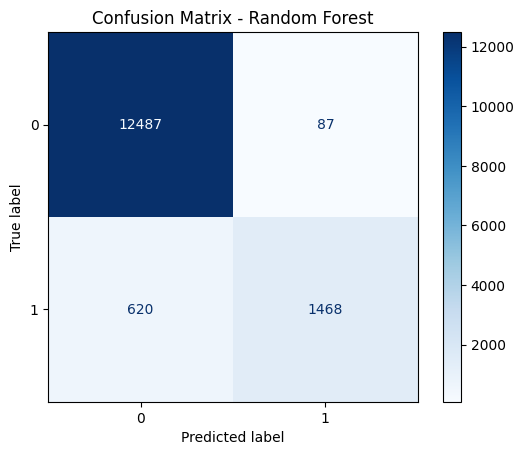

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

# Get best Random Forest model from earlier grid search
best_rf = grid_search_rf.best_estimator_

# Train the model
best_rf.fit(X_train, y_train)

# Get predictions
y_pred = best_rf.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

### AdaBoost

Better learning rate: 0.1 (Accuracy: 0.9516)


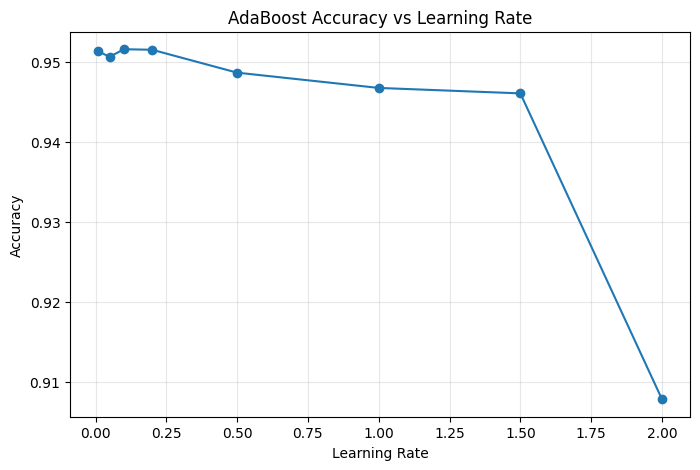

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0]
accuracies = []

X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

for lr in learning_rates:
    ada = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=10, max_features=11, random_state=42),
        n_estimators=200,
        learning_rate=lr,
        random_state=42
    )
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

best_lr = learning_rates[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Better learning rate: {best_lr} (Accuracy: {best_acc:.4f})")

plt.figure(figsize=(8,5))
plt.plot(learning_rates, accuracies, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('AdaBoost Accuracy vs Learning Rate')
plt.grid(True, alpha=0.3)
plt.show()


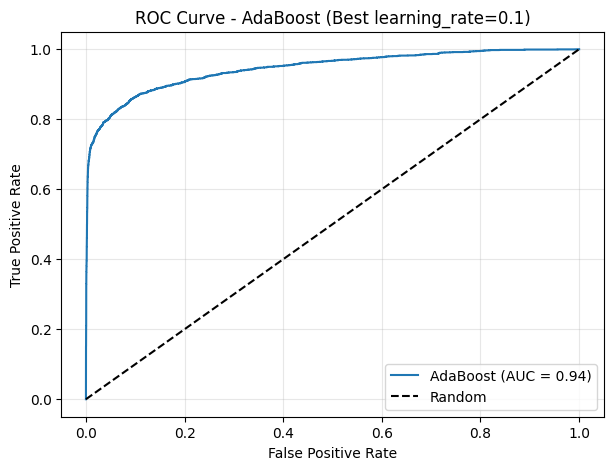

In [40]:
best_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10, max_features=11, random_state=42),
    n_estimators=200,
    learning_rate=best_lr,  
    random_state=42
)
best_ada.fit(X_train, y_train)
y_proba = best_ada.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - AdaBoost (Best learning_rate={best_lr})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Precision, Recall, F1 and Confusion Matrix

In [74]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store precision scores
precision_scores = []

# Get best AdaBoost classifier with optimal learning rate from earlier
best_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10, max_features=11, random_state=42),
    n_estimators=200,
    learning_rate=best_lr,
    random_state=42
)

# Calculate precision using cross-validation
for train_idx, test_idx in cv.split(all_inputs, all_labels):
    # Split the data
    X_train, X_test = all_inputs[train_idx], all_inputs[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    best_ada.fit(X_train, y_train)
    y_pred = best_ada.predict(X_test)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

print("Precision scores for each fold:", precision_scores)
print(f"Average precision across folds: {np.mean(precision_scores):.4f}")
print(f"Standard deviation of precision: {np.std(precision_scores):.4f}")


Precision scores for each fold: [0.9089481946624803, 0.9235668789808917, 0.9306184012066365, 0.9433962264150944, 0.9179566563467493, 0.936608557844691, 0.9404580152671755, 0.9231927710843374, 0.934351145038168, 0.9080118694362018]
Average precision across folds: 0.9267
Standard deviation of precision: 0.0118


In [75]:
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store recall scores
recall_scores = []

# Get best AdaBoost classifier with optimal learning rate 
best_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10, max_features=11, random_state=42),
    n_estimators=200,
    learning_rate=best_lr,
    random_state=42
)

# Calculate recall using cross-validation
for train_idx, test_idx in cv.split(all_inputs, all_labels):
    # Split the data
    X_train, X_test = all_inputs[train_idx], all_inputs[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    best_ada.fit(X_train, y_train)
    y_pred = best_ada.predict(X_test)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

print("Recall scores for each fold:", recall_scores)
print(f"Average recall across folds: {np.mean(recall_scores):.4f}")
print(f"Standard deviation of recall: {np.std(recall_scores):.4f}")


Recall scores for each fold: [0.6934131736526946, 0.6946107784431138, 0.7389221556886227, 0.718562874251497, 0.7101796407185629, 0.7077844311377246, 0.7377245508982035, 0.7341317365269461, 0.732934131736527, 0.732934131736527]
Average recall across folds: 0.7201
Standard deviation of recall: 0.0167


In [76]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store F1 scores
f1_scores = []

# Get best AdaBoost classifier with optimal learning rate
best_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10, max_features=11, random_state=42),
    n_estimators=200,
    learning_rate=best_lr,
    random_state=42
)

# Calculate F1-score using cross-validation
for train_idx, test_idx in cv.split(all_inputs, all_labels):
    # Split the data
    X_train, X_test = all_inputs[train_idx], all_inputs[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    best_ada.fit(X_train, y_train)
    y_pred = best_ada.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

print("F1 scores for each fold:", f1_scores)
print(f"Average F1-score across folds: {np.mean(f1_scores):.4f}")
print(f"Standard deviation of F1-score: {np.std(f1_scores):.4f}")


F1 scores for each fold: [0.7866847826086957, 0.7928913192071086, 0.8237650200267023, 0.8157715839564922, 0.800810263335584, 0.8062755798090041, 0.8268456375838926, 0.8178785857238159, 0.8214765100671141, 0.8111332007952287]
Average F1-score across folds: 0.8104
Standard deviation of F1-score: 0.0128


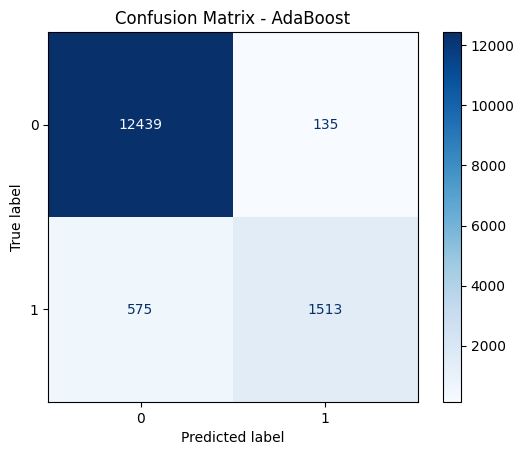

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

# Create and train AdaBoost with best parameters
best_ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=10, max_features=11, random_state=42),
    n_estimators=200,
    learning_rate=best_lr,
    random_state=42
)

# Train the model
best_ada.fit(X_train, y_train)

# Get predictions
y_pred = best_ada.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.show()

# ----------------------------------------------------------------------
#### k-Nearest Neighbors (k-NN)

In [35]:
# IMPORTS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

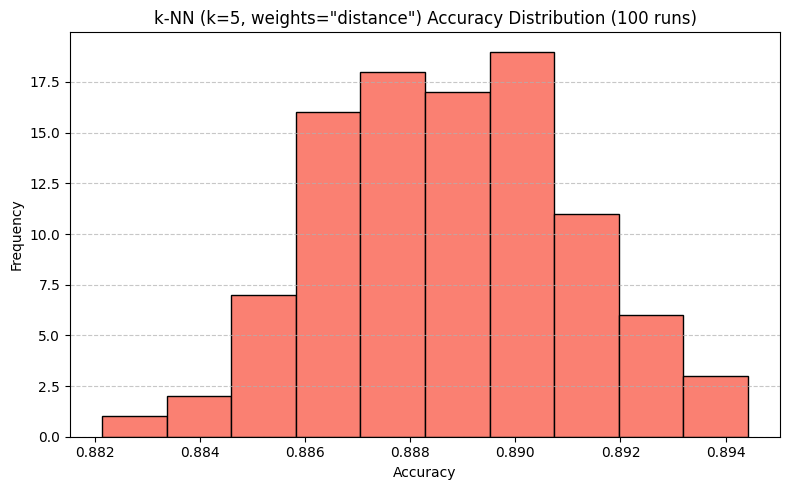

Average Accuracy over 100 runs: 0.8887


In [78]:
k = 5
weights = 'distance'

model_accuracies = []

for repetition in range(100):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn_classifier.fit(training_inputs, training_classes)
    predicted_classes = knn_classifier.predict(testing_inputs)

    model_accuracies.append(accuracy_score(testing_classes, predicted_classes))

plt.figure(figsize=(8, 5))
plt.hist(model_accuracies, bins=10, color='salmon', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'k-NN (k={k}, weights="{weights}") Accuracy Distribution (100 runs)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Average Accuracy over 100 runs: {sum(model_accuracies) / len(model_accuracies):.4f}')


Normalized the input data and applied stratified sampling

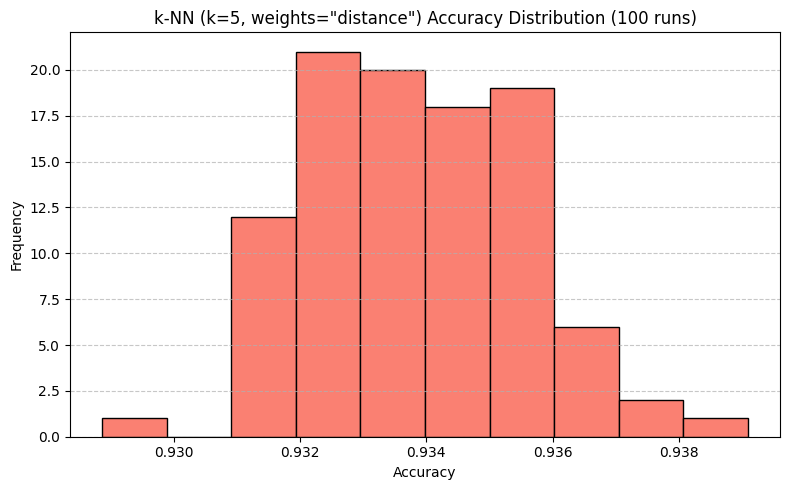

Average Accuracy over 100 runs (updated): 0.9338


In [37]:
k = 5
weights = 'distance'

model_accuracies = []

for repetition in range(100):
    # Split the dataset into training and testing sets (with stratification for balanced classes)
    training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
        all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=repetition
    )

    # Normalize the data -> important for models with distance
    scaler = StandardScaler()
    training_inputs_scaled = scaler.fit_transform(training_inputs)
    testing_inputs_scaled = scaler.transform(testing_inputs)

    # Model k-NN Neighbor
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)
    knn_classifier.fit(training_inputs_scaled, training_classes)
    predicted_classes = knn_classifier.predict(testing_inputs_scaled)

    model_accuracies.append(accuracy_score(testing_classes, predicted_classes))

# Results
plt.figure(figsize=(8, 5))
plt.hist(model_accuracies, bins=10, color='salmon', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'k-NN (k={k}, weights="{weights}") Accuracy Distribution (100 runs)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Average Accuracy over 100 runs (updated): {sum(model_accuracies) / len(model_accuracies):.4f}')


Trying to find the best k value 

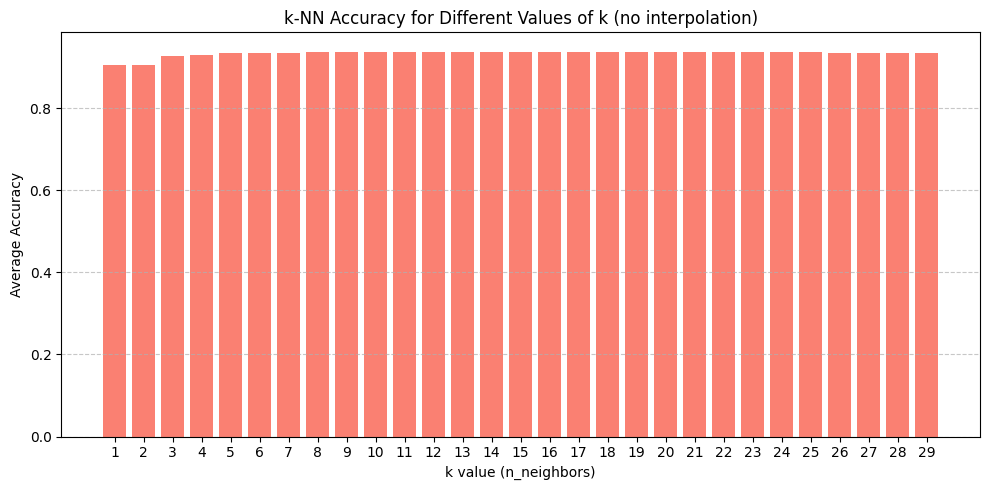

In [38]:
accuracies_by_k = {}

# Testing different values of k
for k in range(1, 30):
    model_accuracies = []
    
    for _ in range(2):
        # Split the dataset into training and testing sets (with stratification for balanced classes)
        training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
            all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=repetition
        )
        
        # Normalize the data
        scaler = StandardScaler()
        training_inputs_scaled = scaler.fit_transform(training_inputs)
        testing_inputs_scaled = scaler.transform(testing_inputs)

        # Model k-NN Neighbor
        knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn_classifier.fit(training_inputs_scaled, training_classes)
        predicted_classes = knn_classifier.predict(testing_inputs_scaled)
        
        model_accuracies.append(accuracy_score(testing_classes, predicted_classes))
    
    # Average of accuracies for the current k
    accuracies_by_k[k] = sum(model_accuracies) / len(model_accuracies)

# Results
plt.figure(figsize=(10, 5))
plt.bar(accuracies_by_k.keys(), accuracies_by_k.values(), color='salmon')
plt.xlabel('k value (n_neighbors)')
plt.ylabel('Average Accuracy')
plt.title('k-NN Accuracy for Different Values of k (no interpolation)')
plt.xticks(list(accuracies_by_k.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


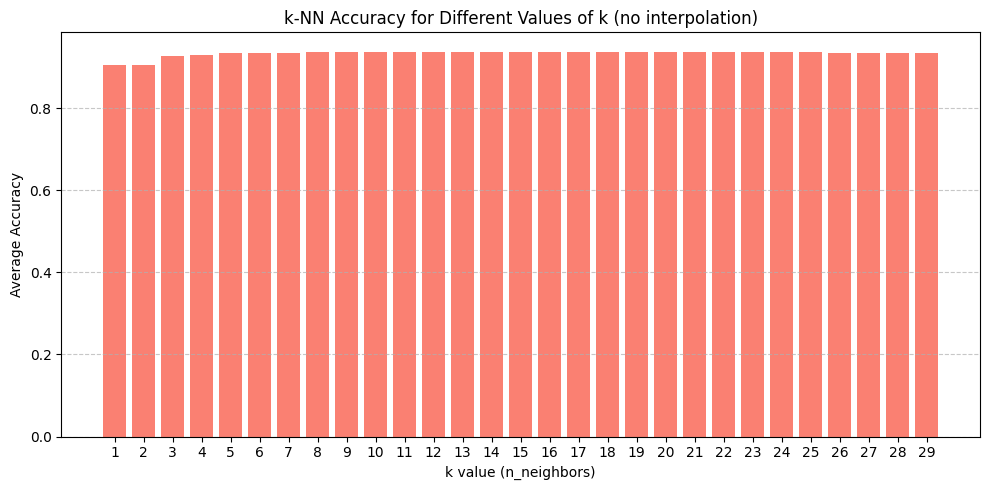

In [39]:
accuracies_by_k = {}

# Testing different values of k
for k in range(1, 30):
    model_accuracies = []
    
    for _ in range(2):
        # Split the dataset into training and testing sets (with stratification for balanced classes)
        training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
            all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=repetition
        )
        
        # Normalize the data
        scaler = StandardScaler()
        training_inputs_scaled = scaler.fit_transform(training_inputs)
        testing_inputs_scaled = scaler.transform(testing_inputs)

        # Model k-NN Neighbor
        knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn_classifier.fit(training_inputs_scaled, training_classes)
        predicted_classes = knn_classifier.predict(testing_inputs_scaled)
        
        model_accuracies.append(accuracy_score(testing_classes, predicted_classes))
    
    # Average of accuracies for the current k
    accuracies_by_k[k] = sum(model_accuracies) / len(model_accuracies)

# Results
plt.figure(figsize=(10, 5))
plt.bar(accuracies_by_k.keys(), accuracies_by_k.values(), color='salmon')
plt.xlabel('k value (n_neighbors)')
plt.ylabel('Average Accuracy')
plt.title('k-NN Accuracy for Different Values of k (no interpolation)')
plt.xticks(list(accuracies_by_k.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Find best performing parameters

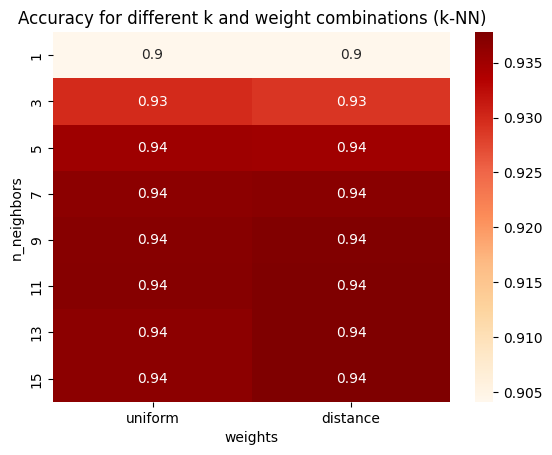

Best score: 0.9378
Best parameters: {'n_neighbors': 11, 'weights': 'distance'}


In [40]:
# Normalize the data
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

# Sets a KNN classifier with stratified cross-validation and a parameter search for optimal values
knn_classifier = KNeighborsClassifier()
parameter_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance']
}
cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Grid Search
grid_search = GridSearchCV(
    estimator=knn_classifier,
    param_grid=parameter_grid,
    cv=cross_validation,
    scoring='accuracy'
)

# Adjusting model
grid_search.fit(all_inputs_scaled, all_labels)

scores = grid_search.cv_results_['mean_test_score']
grid_visualization = np.array(scores).reshape(len(parameter_grid['n_neighbors']), len(parameter_grid['weights']))

# Results
sb.heatmap(grid_visualization, cmap='OrRd', annot=True, xticklabels=parameter_grid['weights'], yticklabels=parameter_grid['n_neighbors'])
plt.xlabel('weights')
plt.ylabel('n_neighbors')
plt.title('Accuracy for different k and weight combinations (k-NN)')
plt.show()

print('Best score: {:.4f}'.format(grid_search.best_score_))
print('Best parameters:', grid_search.best_params_)


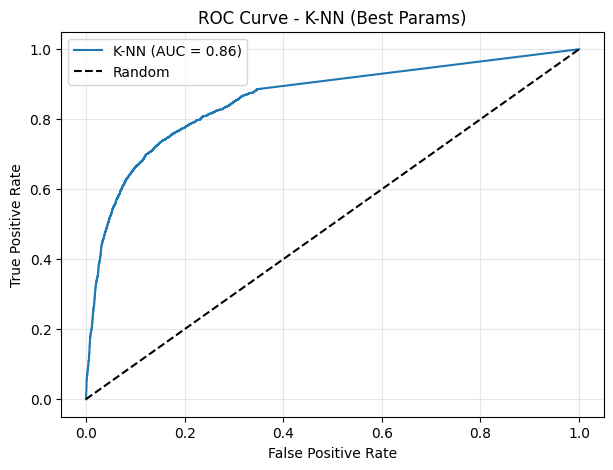

In [41]:
training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

best_tree = grid_search.best_estimator_
best_tree.fit(training_inputs, training_classes)

y_proba = best_tree.predict_proba(testing_inputs)[:, 1]

fpr, tpr, thresholds = roc_curve(testing_classes, y_proba)
auc = roc_auc_score(testing_classes, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'K-NN (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-NN (Best Params)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

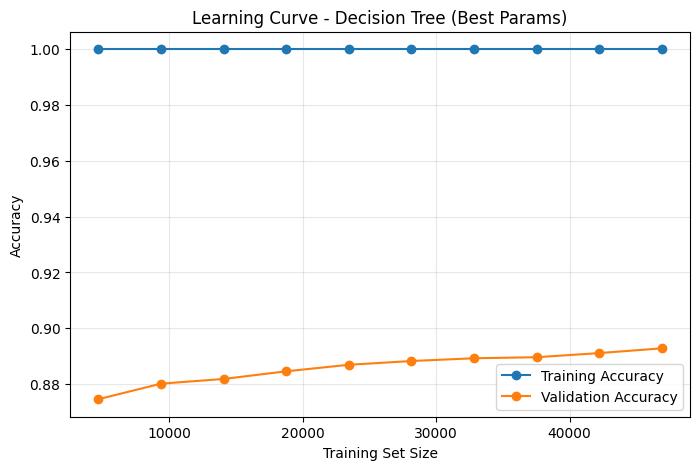

In [ ]:
best_tree = grid_search.best_estimator_

train_sizes, train_scores, val_scores = learning_curve(
    best_tree,
    all_inputs, all_labels,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes, val_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - K-NN (Best Params)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Precision, Recall, F1 and Confusion Matrix

In [43]:
knn_best = grid_search.best_estimator_

precision_scores = cross_val_score(
    knn_best,
    all_inputs_scaled,
    all_labels,
    cv=stratified_kfold,
    scoring='precision'
)

print("Precision scores for each fold (best params):", precision_scores)
print("Average precision across 10 folds (best params): {:.4f}".format(precision_scores.mean()))

Precision scores for each fold (best params): [0.89438944 0.90212072 0.88474026 0.89368771 0.88013136 0.90048154
 0.87581699 0.88513514 0.88812392 0.87438017]
Average precision across 10 folds (best params): 0.8879


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Normalize the data 
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

recall_scores = cross_val_score(
    knn_classifier,
    all_inputs_scaled,
    all_labels,
    cv=stratified_kfold,
    scoring='recall'
)

print("Recall scores for each fold (k-NN):", recall_scores)
print("Average recall across 10 folds (k-NN): {:.4f}".format(recall_scores.mean()))

Recall scores for each fold (k-NN): [0.66107784 0.67185629 0.66347305 0.65389222 0.6491018  0.67185629
 0.6491018  0.63592814 0.61916168 0.62634731]
Average recall across 10 folds (k-NN): 0.6502


In [45]:
# Calculate F1-score
from sklearn.model_selection import cross_val_score, StratifiedKFold

knn_best = grid_search.best_estimator_

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

f1_scores = cross_val_score(
    knn_best,
    all_inputs_scaled,
    all_labels,
    cv=stratified_kfold,
    scoring='f1'
)

print("F1 scores for each fold (best params):", f1_scores)
print("Average F1-score across 10 folds (best params): {:.4f}".format(f1_scores.mean()))

F1 scores for each fold (best params): [0.75225538 0.76381215 0.75120606 0.74878219 0.74238227 0.76954733
 0.74084312 0.73440785 0.72881356 0.73472222]
Average F1-score across 10 folds (best params): 0.7467


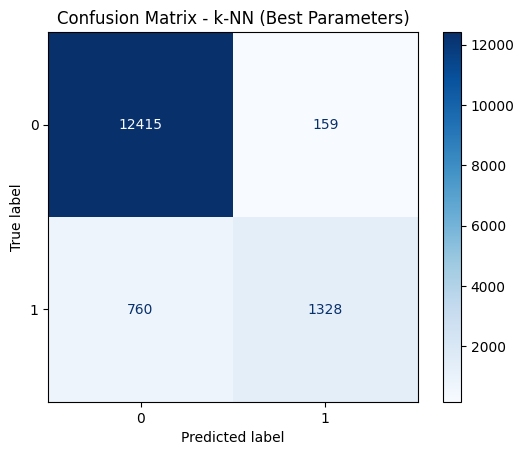

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=1
)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN with best parameters from grid search
knn_best = grid_search.best_estimator_
knn_best.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_best.predict(X_test_scaled)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - k-NN (Best Parameters)")
plt.show()

# ----------------------------------------------------------------------
#### Neural Networks (NN)

In [51]:
# IMPORTS
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [52]:
# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_shape):
        self.model = self.build_model(input_shape)

    def build_model(self, input_shape):
        model = keras.Sequential()
        model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dense(1, activation='sigmoid'))  
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def train(self, X_train, y_train, epochs=50, batch_size=16):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def evaluate(self, X_test, y_test):
        loss, accuracy = self.model.evaluate(X_test, y_test, verbose=0)
        return accuracy

In [55]:
# Neural Network Training and Evaluation
data = pd.read_csv('train.csv')
data = pd.get_dummies(data, columns=["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"])
X = data.drop(columns=['loan_status', 'id']).values
y = data['loan_status'].values

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the neural network
nn = NeuralNetwork(input_shape=X_train.shape[1])
nn.train(X_train, y_train, epochs=10, batch_size=16)

# Evaluating the model
accuracy = nn.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {accuracy:.4f}')

c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8928 - loss: 0.2665
Epoch 2/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9393 - loss: 0.1924
Epoch 3/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9420 - loss: 0.1862
Epoch 4/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9432 - loss: 0.1838
Epoch 5/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9424 - loss: 0.1862
Epoch 6/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9460 - loss: 0.1788
Epoch 7/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9448 - loss: 0.1800
Epoch 8/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9473 - loss: 0.1730
Epoch 9/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9465 - loss: 0.1730
Epoch 10/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9441 - loss: 0.1787
Neural Network Accuracy: 0.9449


Accuracy Distribution

Epoch 1/5


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - accuracy: 0.9192 - loss: 0.2406
Epoch 2/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 598us/step - accuracy: 0.9390 - loss: 0.1938
Epoch 3/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 611us/step - accuracy: 0.9409 - loss: 0.1889
Epoch 4/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 668us/step - accuracy: 0.9407 - loss: 0.1893
Epoch 5/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 0.9453 - loss: 0.1784
Epoch 1/5


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 694us/step - accuracy: 0.8985 - loss: 0.2676
Epoch 2/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.9429 - loss: 0.1836
Epoch 3/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step - accuracy: 0.9414 - loss: 0.1867
Epoch 4/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.9457 - loss: 0.1770
Epoch 5/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 717us/step - accuracy: 0.9438 - loss: 0.1813
Epoch 1/5


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 756us/step - accuracy: 0.9132 - loss: 0.2470
Epoch 2/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 720us/step - accuracy: 0.9376 - loss: 0.1938
Epoch 3/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 729us/step - accuracy: 0.9404 - loss: 0.1878
Epoch 4/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 716us/step - accuracy: 0.9427 - loss: 0.1807
Epoch 5/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 744us/step - accuracy: 0.9410 - loss: 0.1846
Epoch 1/5


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 746us/step - accuracy: 0.9129 - loss: 0.2457
Epoch 2/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - accuracy: 0.9390 - loss: 0.1963
Epoch 3/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 728us/step - accuracy: 0.9421 - loss: 0.1864
Epoch 4/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - accuracy: 0.9426 - loss: 0.1820
Epoch 5/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 722us/step - accuracy: 0.9431 - loss: 0.1823
Epoch 1/5


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 723us/step - accuracy: 0.9037 - loss: 0.2618
Epoch 2/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 726us/step - accuracy: 0.9410 - loss: 0.1923
Epoch 3/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 719us/step - accuracy: 0.9404 - loss: 0.1894
Epoch 4/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 721us/step - accuracy: 0.9422 - loss: 0.1847
Epoch 5/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - accuracy: 0.9415 - loss: 0.1867


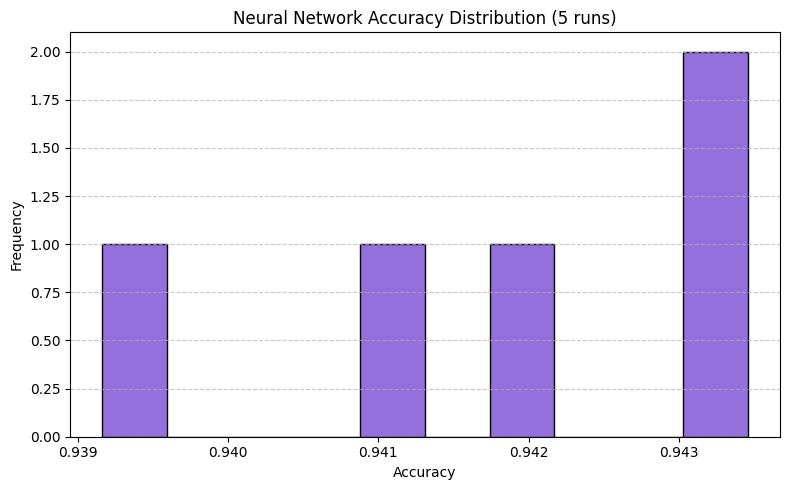

Average Neural Network Accuracy over 5 runs: 0.9417


In [5]:
# Neural Network: Accuracy Distribution over Multiple Runs
nn_accuracies = []
num_runs = 5 

for repetition in range(num_runs):
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, stratify=y, random_state=repetition
    )
    # Normalizing the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Training NN
    nn = NeuralNetwork(input_shape=X_train.shape[1])
    nn.train(X_train_scaled, y_train, epochs=5, batch_size=16) 
    # Evaluating NN
    acc = nn.evaluate(X_test_scaled, y_test)
    nn_accuracies.append(acc)

# Plot accuracy distribution
plt.figure(figsize=(8, 5))
plt.hist(nn_accuracies, bins=10, color='mediumpurple', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Neural Network Accuracy Distribution ({num_runs} runs)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Average Neural Network Accuracy over {num_runs} runs: {np.mean(nn_accuracies):.4f}')

Standard Deviation


In [6]:
std_dev = np.std(nn_accuracies)
print(f'Standard Deviation: {std_dev:.4f}')


Standard Deviation: 0.0016


Minimum/ Maximum Accuracy

In [7]:
min_acc = np.min(nn_accuracies)
max_acc = np.max(nn_accuracies)
print(f'Minimum Accuracy: {min_acc:.4f}')
print(f'Maximum Accuracy: {max_acc:.4f}')


Minimum Accuracy: 0.9392
Maximum Accuracy: 0.9435


Confidence Interval

In [8]:
from scipy import stats

confidence_interval = stats.t.interval(0.95, len(nn_accuracies)-1, loc=np.mean(nn_accuracies), scale=stats.sem(nn_accuracies))
lower_bound, upper_bound = confidence_interval
print(f'95% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})')



95% Confidence Interval: (0.9396, 0.9439)


Boxplot of Accuracy Distribution

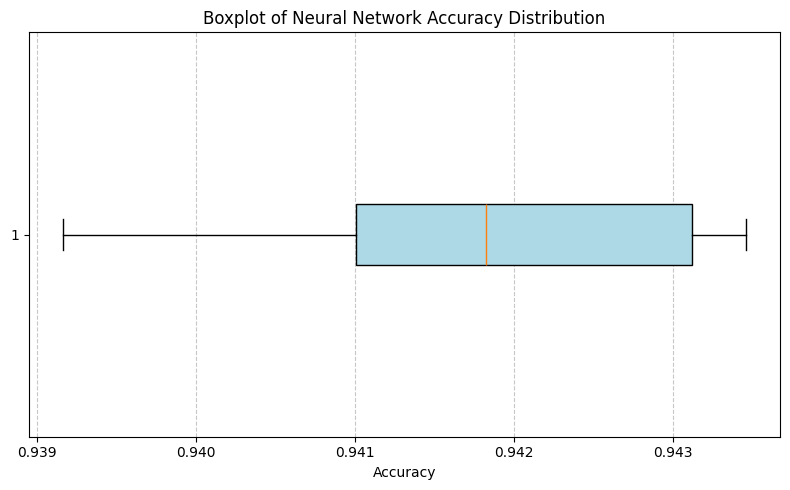

In [9]:
plt.figure(figsize=(8, 5))
plt.boxplot(nn_accuracies, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Boxplot of Neural Network Accuracy Distribution')
plt.xlabel('Accuracy')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\costi\AppData\Local\Temp\ipykernel_10968\1992047977.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(nn_accuracies, shade=True, color='mediumpurple')


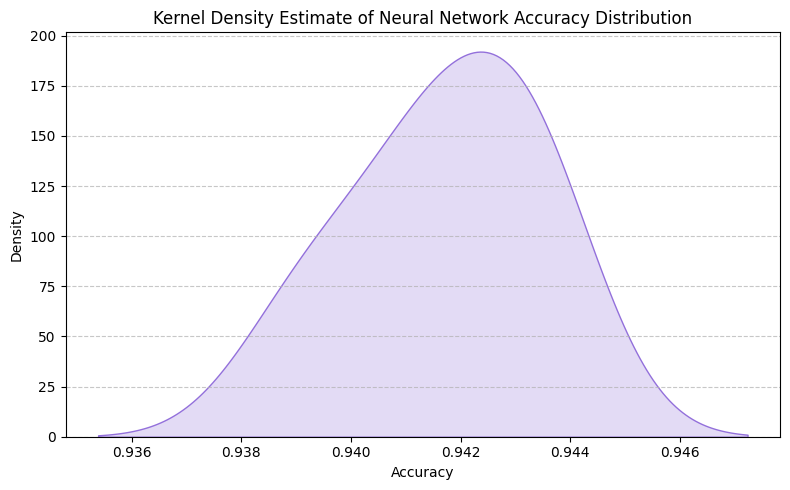

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(nn_accuracies, shade=True, color='mediumpurple')
plt.title('Kernel Density Estimate of Neural Network Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Epoch 1/5


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 650us/step - accuracy: 0.9040 - loss: 0.2603
Epoch 2/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 606us/step - accuracy: 0.9402 - loss: 0.1901
Epoch 3/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 604us/step - accuracy: 0.9415 - loss: 0.1858
Epoch 4/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 696us/step - accuracy: 0.9429 - loss: 0.1807
Epoch 5/5
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 2s 759us/step - accuracy: 0.9430 - loss: 0.1838
459/459 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


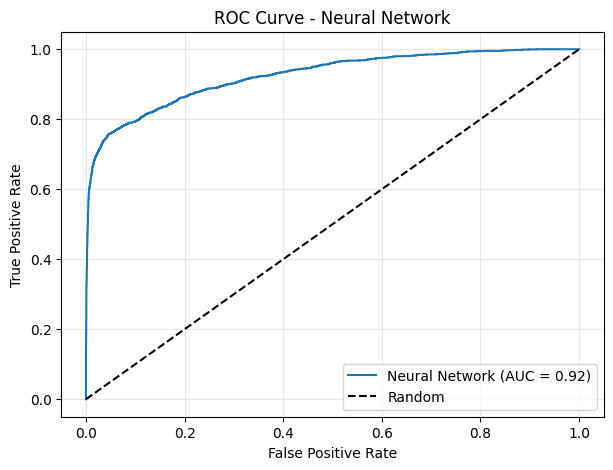

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn = NeuralNetwork(input_shape=X_train.shape[1])
nn.train(X_train_scaled, y_train, epochs=5, batch_size=16)

y_proba = nn.model.predict(X_test_scaled).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.8385 - loss: 0.3856
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9201 - loss: 0.2268
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.9305 - loss: 0.2090
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - accuracy: 0.9335 - loss: 0.2038
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.9389 - loss: 0.1878
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9339 - loss: 0.1951
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9429 - loss: 0.1749
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9453 - loss: 0.1741
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9365 - loss: 0.1874
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9422 - loss: 0.1777
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.8732 - loss: 0.3464
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9236 - loss: 0.2168
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.9310 - loss: 0.1985
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.9296 - loss: 0.2086
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.9402 - loss: 0.1805
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.9352 - loss: 0.1939
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.9358 - loss: 0.1885
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.9423 - loss: 0.1758
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9386 - loss: 0.1830
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9406 - loss: 0.1725
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.8719 - loss: 0.3516
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.9284 - loss: 0.2204
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.9371 - loss: 0.1942
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.9369 - loss: 0.1941
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9395 - loss: 0.1917
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.9408 - loss: 0.1808
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9428 - loss: 0.1681
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9451 - loss: 0.1676
Epoch 9/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9390 - loss: 0.1761
Epoch 10/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9450 - loss: 0.1713
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8917 - loss: 0.2994
Epoch 2/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9318 - loss: 0.2014
Epoch 3/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.9373 - loss: 0.1937
Epoch 4/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.9389 - loss: 0.1940
Epoch 5/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.9386 - loss: 0.1886
Epoch 6/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9414 - loss: 0.1777
Epoch 7/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9407 - loss: 0.1848
Epoch 8/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9422 - loss: 0.1806
Epoch 9/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9438 - loss: 0.1758
Epoch 10/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.9456 - loss: 0.1683
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8810 - loss: 0.3149
Epoch 2/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step - accuracy: 0.9319 - loss: 0.2120
Epoch 3/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.9322 - loss: 0.2079
Epoch 4/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.9391 - loss: 0.1934
Epoch 5/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9393 - loss: 0.1874
Epoch 6/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9384 - loss: 0.1904
Epoch 7/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9394 - loss: 0.1860
Epoch 8/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.9429 - loss: 0.1848
Epoch 9/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.9377 - loss: 0.1907
Epoch 10/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9412 - loss: 0.1810
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8922 - loss: 0.2910
Epoch 2/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.9330 - loss: 0.2076
Epoch 3/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.9363 - loss: 0.1964
Epoch 4/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.9374 - loss: 0.1949
Epoch 5/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step - accuracy: 0.9386 - loss: 0.1890
Epoch 6/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9408 - loss: 0.1800
Epoch 7/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 796us/step - accuracy: 0.9403 - loss: 0.1824
Epoch 8/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step - accuracy: 0.9431 - loss: 0.1728
Epoch 9/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 810us/step - accuracy: 0.9447 - loss: 0.1751
Epoch 10/10
786/786 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.9470 - loss: 0.1668
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.8966 - loss: 0.2892
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9317 - loss: 0.2057
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9361 - loss: 0.1922
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.9386 - loss: 0.1930
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9400 - loss: 0.1867
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9393 - loss: 0.1834
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9386 - loss: 0.1842
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.9407 - loss: 0.1830
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9396 - loss: 0.1816
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.9424 - loss: 0.1784
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8760 - loss: 0.3060
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9340 - loss: 0.2022
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9385 - loss: 0.1967
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.9415 - loss: 0.1851
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.9392 - loss: 0.1894
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9405 - loss: 0.1834
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.9425 - loss: 0.1828
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.9431 - loss: 0.1777
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9455 - loss: 0.1743
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.9454 - loss: 0.1707
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.8881 - loss: 0.2969
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9297 - loss: 0.2093
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 664us/step - accuracy: 0.9373 - loss: 0.1913
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9420 - loss: 0.1831
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.9391 - loss: 0.1906
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9419 - loss: 0.1807
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9429 - loss: 0.1770
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9450 - loss: 0.1754
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9430 - loss: 0.1778
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9470 - loss: 0.1696
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - accuracy: 0.8919 - loss: 0.2771
Epoch 2/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.9368 - loss: 0.1958
Epoch 3/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.9397 - loss: 0.1906
Epoch 4/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.9424 - loss: 0.1823
Epoch 5/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9414 - loss: 0.1834
Epoch 6/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.9434 - loss: 0.1805
Epoch 7/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9446 - loss: 0.1761
Epoch 8/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9432 - loss: 0.1823
Epoch 9/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9440 - loss: 0.1777
Epoch 10/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9477 - loss: 0.1666
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.8876 - loss: 0.2831
Epoch 2/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 666us/step - accuracy: 0.9399 - loss: 0.1927
Epoch 3/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9382 - loss: 0.1931
Epoch 4/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.9405 - loss: 0.1873
Epoch 5/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 673us/step - accuracy: 0.9416 - loss: 0.1859
Epoch 6/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.9396 - loss: 0.1845
Epoch 7/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.9455 - loss: 0.1747
Epoch 8/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.9456 - loss: 0.1760
Epoch 9/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9442 - loss: 0.1776
Epoch 10/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step - accuracy: 0.9470 - loss: 0.1751
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1624/1624 ━━━━━━━━━━━━━━━━━━━━ 2s 693us/step - accuracy: 0.9021 - loss: 0.2731
Epoch 2/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.9362 - loss: 0.1937
Epoch 3/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 757us/step - accuracy: 0.9362 - loss: 0.1920
Epoch 4/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.9418 - loss: 0.1830
Epoch 5/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9423 - loss: 0.1823
Epoch 6/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9434 - loss: 0.1821
Epoch 7/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step - accuracy: 0.9443 - loss: 0.1802
Epoch 8/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.9445 - loss: 0.1780
Epoch 9/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.9445 - loss: 0.1754
Epoch 10/10
1624/1624 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.9454 - loss: 0.1756
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2043/2043 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.9068 - loss: 0.2553
Epoch 2/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.9367 - loss: 0.1970
Epoch 3/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.9403 - loss: 0.1848
Epoch 4/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.9427 - loss: 0.1801
Epoch 5/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.9429 - loss: 0.1822
Epoch 6/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.9438 - loss: 0.1825
Epoch 7/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.9433 - loss: 0.1791
Epoch 8/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9446 - loss: 0.1806
Epoch 9/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 670us/step - accuracy: 0.9468 - loss: 0.1730
Epoch 10/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9442 - loss: 0.1775
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2043/2043 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.8866 - loss: 0.2800
Epoch 2/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9365 - loss: 0.1949
Epoch 3/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.9399 - loss: 0.1888
Epoch 4/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.9420 - loss: 0.1881
Epoch 5/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.9406 - loss: 0.1847
Epoch 6/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9445 - loss: 0.1776
Epoch 7/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9437 - loss: 0.1791
Epoch 8/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9451 - loss: 0.1778
Epoch 9/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 649us/step - accuracy: 0.9461 - loss: 0.1701
Epoch 10/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - accuracy: 0.9462 - loss: 0.1726
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2043/2043 ━━━━━━━━━━━━━━━━━━━━ 2s 641us/step - accuracy: 0.9135 - loss: 0.2464
Epoch 2/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.9360 - loss: 0.1931
Epoch 3/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 638us/step - accuracy: 0.9390 - loss: 0.1894
Epoch 4/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9417 - loss: 0.1855
Epoch 5/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9443 - loss: 0.1792
Epoch 6/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9432 - loss: 0.1808
Epoch 7/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.9458 - loss: 0.1781
Epoch 8/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.9444 - loss: 0.1791
Epoch 9/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.9471 - loss: 0.1723
Epoch 10/10
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.9470 - loss: 0.1728
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.9010 - loss: 0.2622
Epoch 2/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step - accuracy: 0.9374 - loss: 0.1942
Epoch 3/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 674us/step - accuracy: 0.9397 - loss: 0.1893
Epoch 4/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step - accuracy: 0.9441 - loss: 0.1816
Epoch 5/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 675us/step - accuracy: 0.9449 - loss: 0.1788
Epoch 6/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 678us/step - accuracy: 0.9443 - loss: 0.1793
Epoch 7/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 646us/step - accuracy: 0.9464 - loss: 0.1767
Epoch 8/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.9490 - loss: 0.1714
Epoch 9/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 639us/step - accuracy: 0.9477 - loss: 0.1744
Epoch 10/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.9468 - loss: 0.1715
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 630us/step - accuracy: 0.9128 - loss: 0.2538
Epoch 2/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 622us/step - accuracy: 0.9360 - loss: 0.1931
Epoch 3/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 635us/step - accuracy: 0.9407 - loss: 0.1859
Epoch 4/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 628us/step - accuracy: 0.9442 - loss: 0.1778
Epoch 5/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - accuracy: 0.9411 - loss: 0.1824
Epoch 6/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - accuracy: 0.9455 - loss: 0.1751
Epoch 7/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - accuracy: 0.9432 - loss: 0.1842
Epoch 8/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step - accuracy: 0.9450 - loss: 0.1766
Epoch 9/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.9465 - loss: 0.1749
Epoch 10/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 680us/step - accuracy: 0.9439 - loss: 0.1756
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.8918 - loss: 0.2739
Epoch 2/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.9362 - loss: 0.1981
Epoch 3/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 713us/step - accuracy: 0.9411 - loss: 0.1887
Epoch 4/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 635us/step - accuracy: 0.9433 - loss: 0.1810
Epoch 5/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.9455 - loss: 0.1774
Epoch 6/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 634us/step - accuracy: 0.9472 - loss: 0.1718
Epoch 7/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 645us/step - accuracy: 0.9473 - loss: 0.1712
Epoch 8/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.9456 - loss: 0.1747
Epoch 9/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.9448 - loss: 0.1758
Epoch 10/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - accuracy: 0.9470 - loss: 0.1724
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step - accuracy: 0.9104 - loss: 0.2540
Epoch 2/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step - accuracy: 0.9397 - loss: 0.1892
Epoch 3/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 634us/step - accuracy: 0.9416 - loss: 0.1869
Epoch 4/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 637us/step - accuracy: 0.9427 - loss: 0.1841
Epoch 5/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 639us/step - accuracy: 0.9447 - loss: 0.1768
Epoch 6/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 630us/step - accuracy: 0.9464 - loss: 0.1753
Epoch 7/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.9466 - loss: 0.1741
Epoch 8/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 621us/step - accuracy: 0.9477 - loss: 0.1723
Epoch 9/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9476 - loss: 0.1728
Epoch 10/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 628us/step - accuracy: 0.9462 - loss: 0.1740
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 619us/step - accuracy: 0.9107 - loss: 0.2448
Epoch 2/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9401 - loss: 0.1919
Epoch 3/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9410 - loss: 0.1892
Epoch 4/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 632us/step - accuracy: 0.9435 - loss: 0.1826
Epoch 5/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.9453 - loss: 0.1791
Epoch 6/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 639us/step - accuracy: 0.9452 - loss: 0.1800
Epoch 7/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9459 - loss: 0.1749
Epoch 8/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 642us/step - accuracy: 0.9468 - loss: 0.1743
Epoch 9/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 614us/step - accuracy: 0.9475 - loss: 0.1710
Epoch 10/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 616us/step - accuracy: 0.9476 - loss: 0.1722
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.8884 - loss: 0.2713
Epoch 2/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 641us/step - accuracy: 0.9383 - loss: 0.1927
Epoch 3/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - accuracy: 0.9403 - loss: 0.1869
Epoch 4/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 617us/step - accuracy: 0.9427 - loss: 0.1851
Epoch 5/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - accuracy: 0.9425 - loss: 0.1833
Epoch 6/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step - accuracy: 0.9435 - loss: 0.1806
Epoch 7/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 629us/step - accuracy: 0.9457 - loss: 0.1780
Epoch 8/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 640us/step - accuracy: 0.9459 - loss: 0.1747
Epoch 9/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 620us/step - accuracy: 0.9450 - loss: 0.1770
Epoch 10/10
2880/2880 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9470 - loss: 0.1728
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 612us/step - accuracy: 0.9005 - loss: 0.2569
Epoch 2/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - accuracy: 0.9387 - loss: 0.1901
Epoch 3/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step - accuracy: 0.9408 - loss: 0.1871
Epoch 4/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 619us/step - accuracy: 0.9421 - loss: 0.1854
Epoch 5/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step - accuracy: 0.9434 - loss: 0.1833
Epoch 6/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 613us/step - accuracy: 0.9450 - loss: 0.1800
Epoch 7/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step - accuracy: 0.9462 - loss: 0.1743
Epoch 8/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 628us/step - accuracy: 0.9472 - loss: 0.1709
Epoch 9/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 623us/step - accuracy: 0.9465 - loss: 0.1732
Epoch 10/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 632us/step - accuracy: 0.9446 - loss: 0.1795
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9118 - loss: 0.2483
Epoch 2/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step - accuracy: 0.9387 - loss: 0.1951
Epoch 3/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 636us/step - accuracy: 0.9426 - loss: 0.1853
Epoch 4/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 634us/step - accuracy: 0.9428 - loss: 0.1859
Epoch 5/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step - accuracy: 0.9431 - loss: 0.1861
Epoch 6/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - accuracy: 0.9458 - loss: 0.1781
Epoch 7/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 632us/step - accuracy: 0.9449 - loss: 0.1808
Epoch 8/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 630us/step - accuracy: 0.9476 - loss: 0.1732
Epoch 9/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 626us/step - accuracy: 0.9471 - loss: 0.1743
Epoch 10/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 623us/step - accuracy: 0.9473 - loss: 0.1737
Epoch 1/10


c:\Users\costi\Desktop\Projects\IA_project2\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - accuracy: 0.9171 - loss: 0.2406
Epoch 2/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 649us/step - accuracy: 0.9377 - loss: 0.1930
Epoch 3/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 627us/step - accuracy: 0.9417 - loss: 0.1860
Epoch 4/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 633us/step - accuracy: 0.9429 - loss: 0.1828
Epoch 5/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 632us/step - accuracy: 0.9433 - loss: 0.1811
Epoch 6/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 621us/step - accuracy: 0.9460 - loss: 0.1767
Epoch 7/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 621us/step - accuracy: 0.9467 - loss: 0.1755
Epoch 8/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - accuracy: 0.9480 - loss: 0.1744
Epoch 9/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - accuracy: 0.9446 - loss: 0.1780
Epoch 10/10
3299/3299 ━━━━━━━━━━━━━━━━━━━━ 2s 621us/step - accuracy: 0.9482 - loss: 0.1706


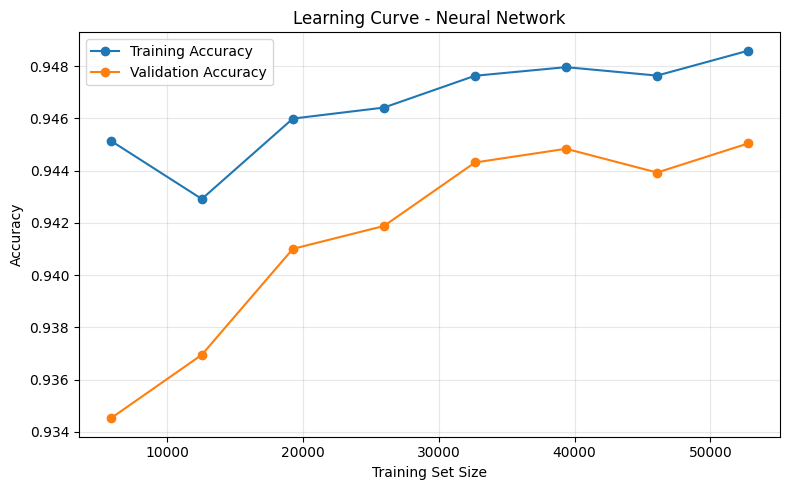

In [18]:
from sklearn.model_selection import train_test_split

train_sizes = np.linspace(0.1, 0.9, 8)
train_mean = []
val_mean = []

for frac in train_sizes:
    train_accs = []
    val_accs = []
    for seed in range(3): 
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, train_size=frac, stratify=y, random_state=seed
        )
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        nn = NeuralNetwork(input_shape=X_train.shape[1])
        nn.train(X_train_scaled, y_train, epochs=10, batch_size=16)
        train_accs.append(nn.evaluate(X_train_scaled, y_train))
        val_accs.append(nn.evaluate(X_val_scaled, y_val))
    train_mean.append(np.mean(train_accs))
    val_mean.append(np.mean(val_accs))

plt.figure(figsize=(8,5))
plt.plot(train_sizes * len(X), train_mean, 'o-', label='Training Accuracy')
plt.plot(train_sizes * len(X), val_mean, 'o-', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Neural Network')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Precision, Recall, F1 and Confusion Matrix

In [ ]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store results
precision_scores = []
num_runs = 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale the full dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate precision using cross-validation
for train_idx, test_idx in skf.split(X_scaled, y):
    # Split data
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Create and train model
    nn = NeuralNetwork(input_shape=X_train.shape[1])
    nn.train(X_train, y_train, epochs=10, batch_size=16)  
    
    # Get predictions and calculate precision
    y_pred = nn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

print("Precision scores for each fold:", precision_scores)
print(f"Average precision across {len(precision_scores)} folds: {np.mean(precision_scores):.4f}")
print(f"Standard deviation of precision: {np.std(precision_scores):.4f}")



Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.9044 - loss: 0.2540
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.9404 - loss: 0.1890
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9408 - loss: 0.1868
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.9446 - loss: 0.1776
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.9464 - loss: 0.1765
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 44s 13ms/step - accuracy: 0.9451 - loss: 0.1793
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9458 - loss: 0.1754
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9463 - loss: 0.1722
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9470 - loss: 0.1700
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9494 - loss: 0.1660
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - accuracy: 0.9051 - loss: 0.2581
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9376 - loss: 0.1940
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9414 - loss: 0.1870
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9420 - loss: 0.1817
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9442 - loss: 0.1809
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.9448 - loss: 0.1778
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.9451 - loss: 0.1779
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9468 - loss: 0.1726
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9469 - loss: 0.1745
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9461 - loss: 0.1741
367/367 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9061 - loss: 0.2566
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9410 - loss: 0.1876
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.9432 - loss: 0.1841
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9448 - loss: 0.1774
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.9449 - loss: 0.1788
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.9453 - loss: 0.1779
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9465 - loss: 0.1749
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9456 - loss: 0.1751
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9487 - loss: 0.1702
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9473 - loss: 0.1707
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9168 - loss: 0.2443
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9372 - loss: 0.1974
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9403 - loss: 0.1910
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9428 - loss: 0.1852
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9442 - loss: 0.1830
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9439 - loss: 0.1836
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9437 - loss: 0.1816
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9444 - loss: 0.1797
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9448 - loss: 0.1777
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9460 - loss: 0.1748
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9154 - loss: 0.2440
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9388 - loss: 0.1926
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9428 - loss: 0.1845
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9423 - loss: 0.1874
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9440 - loss: 0.1792
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9443 - loss: 0.1790
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9447 - loss: 0.1781
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9472 - loss: 0.1740
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9460 - loss: 0.1767
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9461 - loss: 0.1726
367/367 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision scores for each fold: [0.9086460032626428, 0.8781575037147102, 0.91147540983

In [ ]:
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store results
recall_scores = []
num_runs = 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale the full dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate recall using cross-validation
for train_idx, test_idx in skf.split(X_scaled, y):
    # Split data
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Create and train model
    nn = NeuralNetwork(input_shape=X_train.shape[1])
    nn.train(X_train, y_train, epochs=10, batch_size=16)
    
    # Get predictions and calculate recall
    y_pred = nn.predict(X_test)
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

print("Recall scores for each fold:", recall_scores)
print(f"Average recall across {len(recall_scores)} folds: {np.mean(recall_scores):.4f}")
print(f"Standard deviation of recall: {np.std(recall_scores):.4f}")


Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 921us/step - accuracy: 0.9147 - loss: 0.2469
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 932us/step - accuracy: 0.9409 - loss: 0.1905
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 937us/step - accuracy: 0.9424 - loss: 0.1833
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 928us/step - accuracy: 0.9443 - loss: 0.1799
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - accuracy: 0.9438 - loss: 0.1795
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 909us/step - accuracy: 0.9463 - loss: 0.1756
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.9481 - loss: 0.1708
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 921us/step - accuracy: 0.9469 - loss: 0.1740
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 895us/step - accuracy: 0.9469 - loss: 0.1750
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step - accuracy: 0.9480 - loss: 0.1707
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 905us/step - accuracy: 0.9151 - loss: 0.2472
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 937us/step - accuracy: 0.9407 - loss: 0.1884
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.9403 - loss: 0.1897
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 929us/step - accuracy: 0.9423 - loss: 0.1868
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.9429 - loss: 0.1828
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - accuracy: 0.9445 - loss: 0.1776
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - accuracy: 0.9449 - loss: 0.1781
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.9453 - loss: 0.1777
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - accuracy: 0.9471 - loss: 0.1744
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.9468 - loss: 0.1764
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 935us/step - accuracy: 0.9157 - loss: 0.2403
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 944us/step - accuracy: 0.9386 - loss: 0.1927
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9412 - loss: 0.1848
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 934us/step - accuracy: 0.9418 - loss: 0.1847
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 899us/step - accuracy: 0.9447 - loss: 0.1781
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - accuracy: 0.9436 - loss: 0.1802
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - accuracy: 0.9456 - loss: 0.1769
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9450 - loss: 0.1791
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.9464 - loss: 0.1751
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 922us/step - accuracy: 0.9481 - loss: 0.1712
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 898us/step - accuracy: 0.9087 - loss: 0.2500
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 955us/step - accuracy: 0.9382 - loss: 0.1943
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.9431 - loss: 0.1848
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - accuracy: 0.9423 - loss: 0.1847
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 896us/step - accuracy: 0.9432 - loss: 0.1821
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - accuracy: 0.9461 - loss: 0.1771
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 880us/step - accuracy: 0.9432 - loss: 0.1843
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 916us/step - accuracy: 0.9462 - loss: 0.1777
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 887us/step - accuracy: 0.9446 - loss: 0.1778
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 941us/step - accuracy: 0.9456 - loss: 0.1771
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.9066 - loss: 0.2556
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - accuracy: 0.9385 - loss: 0.1919
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 949us/step - accuracy: 0.9391 - loss: 0.1908
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.9416 - loss: 0.1852
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 889us/step - accuracy: 0.9421 - loss: 0.1820
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.9438 - loss: 0.1816
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9457 - loss: 0.1767
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9427 - loss: 0.1813
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 907us/step - accuracy: 0.9453 - loss: 0.1785
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 914us/step - accuracy: 0.9480 - loss: 0.1687
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step
Recall scores for each fold: [0.6784431137724551, 0.690419161676646

In [61]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Initialize lists to store results
f1_scores = []
num_runs = 5
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scale the full dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate F1-score using cross-validation
for train_idx, test_idx in skf.split(X_scaled, y):
    # Split data
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Create and train model
    nn = NeuralNetwork(input_shape=X_train.shape[1])
    nn.train(X_train, y_train, epochs=10, batch_size=16)
    
    # Get predictions and calculate F1-score
    y_pred = nn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Print results
print("F1 scores for each fold:", f1_scores)
print(f"Average F1-score across {len(f1_scores)} folds: {np.mean(f1_scores):.4f}")
print(f"Standard deviation of F1-score: {np.std(f1_scores):.4f}")


Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9062 - loss: 0.2567
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9396 - loss: 0.1873
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 987us/step - accuracy: 0.9427 - loss: 0.1823
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9444 - loss: 0.1796   
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9431 - loss: 0.1796
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 983us/step - accuracy: 0.9439 - loss: 0.1801
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 986us/step - accuracy: 0.9458 - loss: 0.1758
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 973us/step - accuracy: 0.9484 - loss: 0.1686
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9480 - loss: 0.1701
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 968us/step - accuracy: 0.9470 - loss: 0.1714
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 985us/step - accuracy: 0.9124 - loss: 0.2496
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 996us/step - accuracy: 0.9381 - loss: 0.1954
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 992us/step - accuracy: 0.9420 - loss: 0.1858
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 956us/step - accuracy: 0.9436 - loss: 0.1831
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9431 - loss: 0.1829  
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 960us/step - accuracy: 0.9433 - loss: 0.1836
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.9438 - loss: 0.1787
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 918us/step - accuracy: 0.9458 - loss: 0.1750
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.9447 - loss: 0.1789
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - accuracy: 0.9477 - loss: 0.1721
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 885us/step - accuracy: 0.9101 - loss: 0.2484
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.9357 - loss: 0.1955
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 912us/step - accuracy: 0.9392 - loss: 0.1916
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - accuracy: 0.9428 - loss: 0.1801
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9436 - loss: 0.1807
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - accuracy: 0.9445 - loss: 0.1804
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 910us/step - accuracy: 0.9459 - loss: 0.1765
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.9451 - loss: 0.1768
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 920us/step - accuracy: 0.9468 - loss: 0.1756
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 900us/step - accuracy: 0.9478 - loss: 0.1690
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step - accuracy: 0.9081 - loss: 0.2579
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 919us/step - accuracy: 0.9378 - loss: 0.1947
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 930us/step - accuracy: 0.9419 - loss: 0.1859
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 927us/step - accuracy: 0.9412 - loss: 0.1850
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - accuracy: 0.9435 - loss: 0.1821
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 924us/step - accuracy: 0.9440 - loss: 0.1814
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 941us/step - accuracy: 0.9446 - loss: 0.1776
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 946us/step - accuracy: 0.9434 - loss: 0.1838
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 950us/step - accuracy: 0.9467 - loss: 0.1753
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 956us/step - accuracy: 0.9467 - loss: 0.1726
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step
Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9132 - loss: 0.2486
Epoch 2/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 937us/step - accuracy: 0.9379 - loss: 0.1944
Epoch 3/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 937us/step - accuracy: 0.9409 - loss: 0.1856
Epoch 4/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 940us/step - accuracy: 0.9430 - loss: 0.1849
Epoch 5/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 931us/step - accuracy: 0.9434 - loss: 0.1811
Epoch 6/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 943us/step - accuracy: 0.9437 - loss: 0.1804
Epoch 7/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 926us/step - accuracy: 0.9471 - loss: 0.1728
Epoch 8/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 959us/step - accuracy: 0.9443 - loss: 0.1793
Epoch 9/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.9453 - loss: 0.1767
Epoch 10/10
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 3s 952us/step - accuracy: 0.9455 - loss: 0.1782
367/367 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step
F1 scores for each fold: [0.768081494057725, 0.78852798894264, 0.76

Epoch 1/10


c:\Users\diana\OneDrive\Documentos\uni\3ano_2semestre\ia\IA_project2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 904us/step - accuracy: 0.9005 - loss: 0.2632
Epoch 2/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 955us/step - accuracy: 0.9394 - loss: 0.1941
Epoch 3/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 933us/step - accuracy: 0.9404 - loss: 0.1863
Epoch 4/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.9433 - loss: 0.1824
Epoch 5/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 913us/step - accuracy: 0.9420 - loss: 0.1844
Epoch 6/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 901us/step - accuracy: 0.9452 - loss: 0.1778
Epoch 7/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 911us/step - accuracy: 0.9453 - loss: 0.1783
Epoch 8/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.9425 - loss: 0.1831
Epoch 9/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 925us/step - accuracy: 0.9461 - loss: 0.1755
Epoch 10/10
2749/2749 ━━━━━━━━━━━━━━━━━━━━ 3s 918us/step - accuracy: 0.9473 - loss: 0.1716
459/459 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


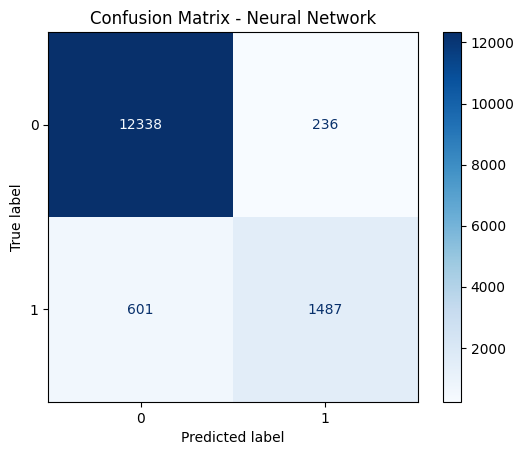

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the neural network
nn = NeuralNetwork(input_shape=X_train.shape[1])
nn.train(X_train_scaled, y_train, epochs=10, batch_size=16)

# Get predictions
y_pred = nn.predict(X_test_scaled)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Neural Network")
plt.show()

# ----------------------------------------------------------------------
#### Support Vector Machines (SVM)

In [35]:
# IMPORTS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

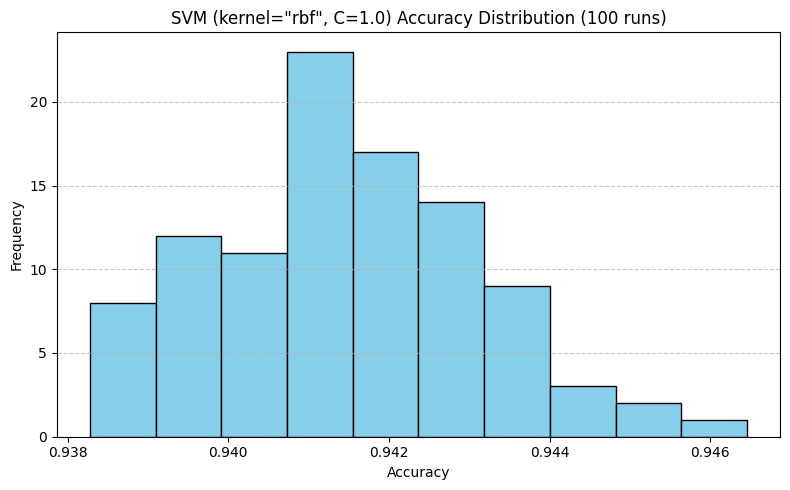

Average Accuracy over 100 runs: 0.9414


In [79]:
# SVM with basic train-test split
kernel = 'rbf' 
C = 1.0

model_accuracies = []

for repetition in range(100):
    training_inputs, testing_inputs, training_classes, testing_classes = train_test_split(
        all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=repetition
    )

    # Normalize the data
    scaler = StandardScaler()
    training_inputs_scaled = scaler.fit_transform(training_inputs)
    testing_inputs_scaled = scaler.transform(testing_inputs)

    # Train the SVM classifier
    svm_classifier = SVC(kernel=kernel, C=C, random_state=1)
    svm_classifier.fit(training_inputs_scaled, training_classes)

    # Predict and evaluate
    predicted_classes = svm_classifier.predict(testing_inputs_scaled)
    model_accuracies.append(accuracy_score(testing_classes, predicted_classes))

# Plot accuracy distribution
plt.figure(figsize=(8, 5))
plt.hist(model_accuracies, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'SVM (kernel="{kernel}", C={C}) Accuracy Distribution (100 runs)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Average Accuracy over 100 runs: {sum(model_accuracies) / len(model_accuracies):.4f}')

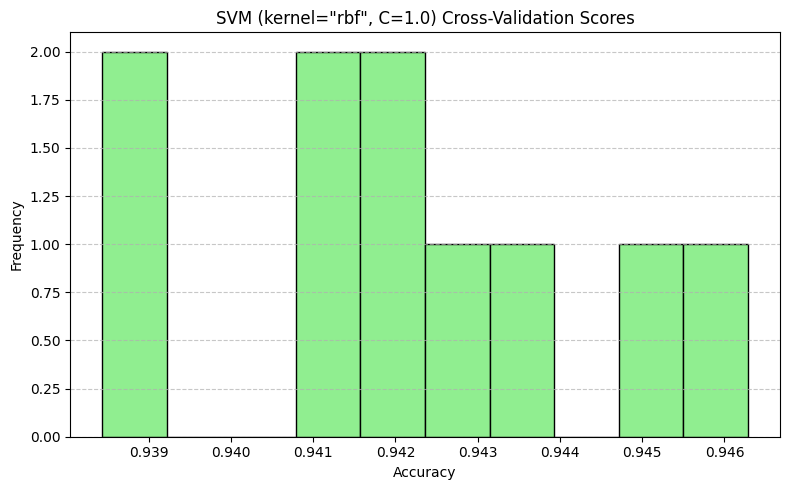

Cross-Validation Scores: [0.94134697 0.94526854 0.943052   0.94168798 0.94390452 0.9462824
 0.94167804 0.9415075  0.93894952 0.93843793]
Average accuracy across 10 folds: 0.9422


In [80]:
# SVM with Stratified K-Fold Cross-Validation
kernel = 'rbf'
C = 1.0

# Normalize the data
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

# Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
svm_classifier = SVC(kernel=kernel, C=C, random_state=1)

cv_scores = cross_val_score(svm_classifier, all_inputs_scaled, all_labels, cv=stratified_kfold, scoring='accuracy')

# Plot cross-validation scores
plt.figure(figsize=(8, 5))
plt.hist(cv_scores, bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'SVM (kernel="{kernel}", C={C}) Cross-Validation Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average accuracy across 10 folds: {np.mean(cv_scores):.4f}')

Precision, Recall, F1 and Confusion Matrix

In [82]:
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store precision scores
precision_scores = []

# Create and configure SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Scale the input data
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

# Calculate precision using cross-validation
for train_idx, test_idx in cv.split(all_inputs_scaled, all_labels):
    # Split the data
    X_train, X_test = all_inputs_scaled[train_idx], all_inputs_scaled[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

print("Precision scores for each fold:", precision_scores)
print(f"Average precision across folds: {np.mean(precision_scores):.4f}")
print(f"Standard deviation of precision: {np.std(precision_scores):.4f}")

Precision scores for each fold: [0.9019607843137255, 0.8919382504288165, 0.9016129032258065, 0.9136212624584718, 0.8986710963455149, 0.9279731993299832, 0.9188741721854304, 0.912, 0.9119601328903655, 0.8929133858267716]
Average precision across folds: 0.9072
Standard deviation of precision: 0.0111


In [84]:
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store recall scores
recall_scores = []

# Create and configure SVM classifier 
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Scale the input data
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

# Calculate recall using cross-validation
for train_idx, test_idx in cv.split(all_inputs_scaled, all_labels):
    # Split the data
    X_train, X_test = all_inputs_scaled[train_idx], all_inputs_scaled[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

print("Recall scores for each fold:", recall_scores)
print(f"Average recall across folds: {np.mean(recall_scores):.4f}") 
print(f"Standard deviation of recall: {np.std(recall_scores):.4f}")


Recall scores for each fold: [0.6610778443113773, 0.6227544910179641, 0.6694610778443114, 0.6586826347305389, 0.6479041916167665, 0.6634730538922156, 0.6646706586826348, 0.6826347305389222, 0.6574850299401198, 0.6790419161676646]
Average recall across folds: 0.6607
Standard deviation of recall: 0.0159


In [85]:
from sklearn.metrics import f1_score 
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Create stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize list to store F1 scores
f1_scores = []

# Create and configure SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)

# Scale the input data
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

# Calculate F1-score using cross-validation
for train_idx, test_idx in cv.split(all_inputs_scaled, all_labels):
    # Split the data
    X_train, X_test = all_inputs_scaled[train_idx], all_inputs_scaled[test_idx]
    y_train, y_test = all_labels[train_idx], all_labels[test_idx]
    
    # Train and predict
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

print("F1 scores for each fold:", f1_scores)
print(f"Average F1-score across folds: {np.mean(f1_scores):.4f}")
print(f"Standard deviation of F1-score: {np.std(f1_scores):.4f}")


F1 scores for each fold: [0.7629578438147893, 0.7334273624823695, 0.768384879725086, 0.7654836464857342, 0.7529575504523313, 0.7737430167597765, 0.7713690062543433, 0.7808219178082192, 0.7640918580375783, 0.7714285714285715]
Average F1-score across folds: 0.7645
Standard deviation of F1-score: 0.0125


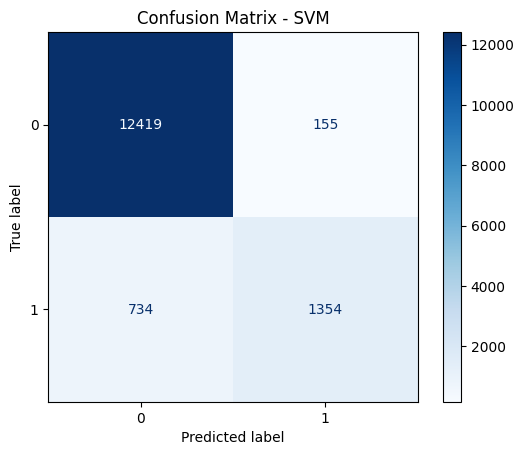

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    all_inputs, all_labels, test_size=0.25, stratify=all_labels, random_state=42
)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Get predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()